# Computer Vision - P5

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P5_Student1_Student2.zip** that includes:
    - The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): December 11th, 23:00 h** 

==============================================================================================
## Practicum 5: Image search using textures


==============================================================================================



The exercises of this notebook will show how we can perform image similarity search using:

- Gaussian filters
- Descriptors based on texture and color

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.



 The function should return a feature vector obtained by averaging each filter response on the image.  

**Hint**: Note that since at this moment we are focusing on the texture, we will not use the color of the images.

## Looking at the images

In [1]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage import io
import os

from scipy import ndimage as nd

import matplotlib.pyplot as plt

In [2]:
path = "./images/texturesimages/buildings/"
building_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/forest/"
forest_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/sunset/"
sunset_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

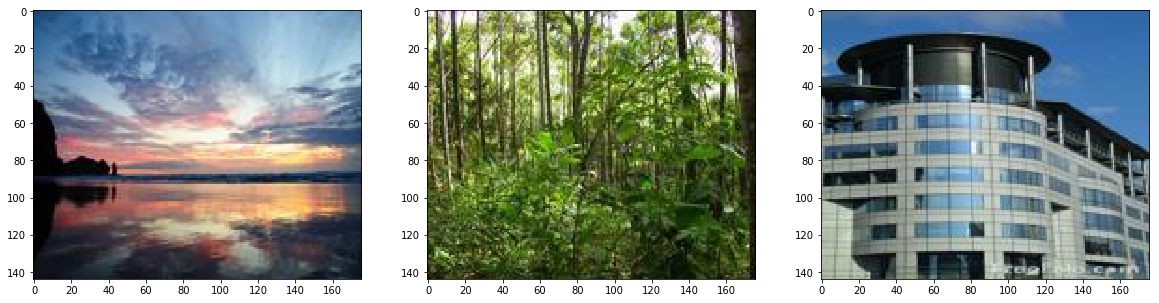

In [3]:
fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(20,30))

ax[0].imshow(sunset_images[0])
ax[1].imshow(forest_images[0])
ax[2].imshow(building_images[0])
plt.show()

In [4]:
len(sunset_images), len(forest_images), len(sunset_images)

(30, 30, 30)

# Filter banks

We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">


## Leung-Malik (LM) Filter Bank

In [5]:
import LM_filters

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


In [6]:
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

(49, 49, 48)

### Plotting all filters

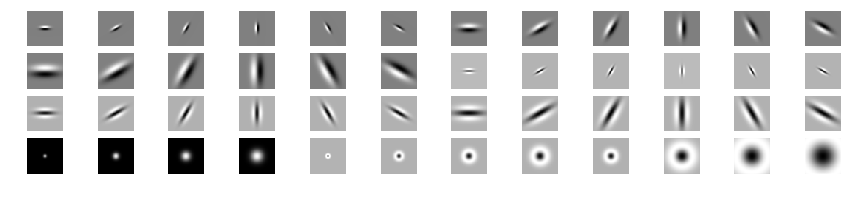

In [7]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1


## Exercise 5.1 Plot the convolved image by some of the filters


Make a function `visualize_features(im,  filter_bank, n_filters=5)` that recieves the `filter_bank`, an image `im` and an integer `n_filters`. 

The function  must make a plot of two rows containing in the first row, in position $k$, the image convolved by filter $k$. In the second row, in position $k$, the image of the k'th filter. The result for `n_filter=5` should look like 


<img src="./images/filters.png">


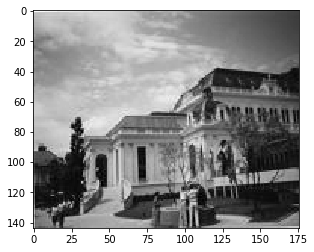

In [16]:
im = building_images[5]
im = skimage.color.rgb2gray(im)
plt.imshow(im, cmap="gray")
plt.show()

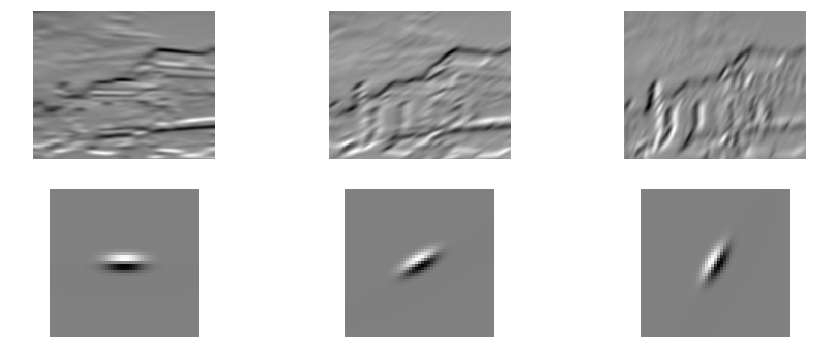

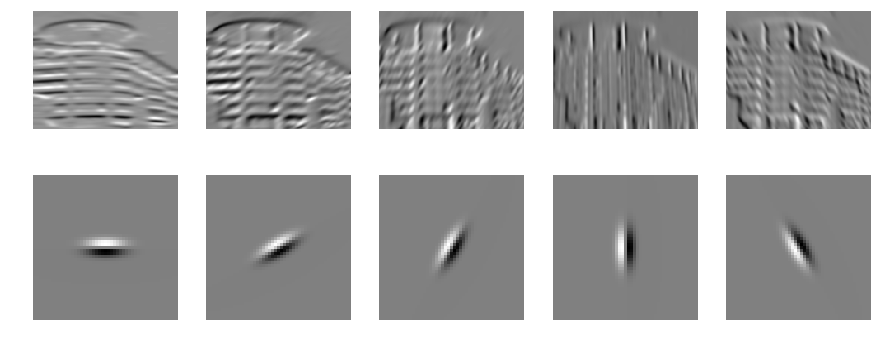

In [9]:
def visualize_features(im,  filter_bank, n_filters=5):
    fig, ax = plt.subplots(ncols=n_filters, nrows=2, figsize=(15,6))
    # complete this function
    if (n_filters > filter_bank.shape[-1]):
        n_filters = filter_bank.shape[-1]

    for j in range(n_filters):
        
        conv = nd.convolve(im, filter_bank[:,:,j] )
                                            
        ax[0,j].imshow(conv, cmap = 'gray')
        ax[0,j].axis("off")
        
        ax[1,j].imshow(filter_bank[:,:,j], cmap = 'gray')
        ax[1,j].axis("off")

visualize_features(im, filter_bank, 3)

im2 = skimage.color.rgb2gray(building_images[0])
visualize_features(im2, filter_bank)



## Exercise 5.2 Constructing a feature vector for a given image


Given $D$ filters from the filter bank and a single image `image`, make a function `features_from_filter_bank(image, filter_bank, n_filters)` that returns a feature vector of shape `n_filters`. The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$



In [46]:
%%time

#find the abs mean of the diferent n_filters convolutions and return them in features_for_im vector
def features_from_filter_bank(image, filter_bank, n_filters):
    ## Complete this function
    im_conv = np.zeros(image.shape)
    features_for_im = np.zeros(n_filters)
    
    for i in range(n_filters):
        im_conv = nd.convolve(image, filter_bank[:,:,i] )
        mean = np.mean( np.abs(im_conv) )
        features_for_im[i] = mean
    return features_for_im


im = skimage.color.rgb2gray(building_images[0])
features_for_im = features_from_filter_bank(im, filter_bank, n_filters)
print(features_for_im)

[2.21469231e-02 1.58900275e-02 1.26171467e-02 1.58414955e-02
 1.43713338e-02 1.92448031e-02 1.28582071e-02 7.56540440e-03
 6.85812201e-03 9.07448773e-03 7.90332600e-03 9.53493042e-03
 7.36411067e-03 5.26016089e-03 4.96634658e-03 6.19999308e-03
 5.84671985e-03 6.38729935e-03 1.24974239e-02 6.55144477e-03
 5.29876846e-03 9.45092967e-03 6.28792070e-03 8.66085869e-03
 4.53164492e-03 1.97684101e-03 1.45035044e-03 2.79910185e-03
 1.72854145e-03 2.78964757e-03 1.81711728e-03 8.29927911e-04
 7.36324186e-04 1.26453262e-03 8.69156174e-04 1.14970474e-03
 1.58945706e+00 3.17891412e+00 4.76837112e+00 6.35764429e+00
 7.94728531e-01 3.97364265e-01 2.64909376e-01 1.98562727e-01
 2.64909376e-01 1.22053115e-01 3.87684911e-02 3.05265951e-03]
Wall time: 9.03 s


## Exercise 5.3 Constructing the matrix of the feature vectors for all images

Implement a function `get_class_Features(all_images, filter_bank)` that applies `features_from_filter_bank` to get a feature vector for each of the images in the union of the three datasets (forest, buildings, sunset). It must return a matrix containing at row $k$ feature vector for the input image $k$.


Wall time: 7min 49s

In [47]:
all_images = building_images + forest_images + sunset_images

[2.21469231e-02 1.58900275e-02 1.26171467e-02 1.58414955e-02
 1.43713338e-02 1.92448031e-02 1.28582071e-02 7.56540440e-03
 6.85812201e-03 9.07448773e-03 7.90332600e-03 9.53493042e-03
 7.36411067e-03 5.26016089e-03 4.96634658e-03 6.19999308e-03
 5.84671985e-03 6.38729935e-03 1.24974239e-02 6.55144477e-03
 5.29876846e-03 9.45092967e-03 6.28792070e-03 8.66085869e-03
 4.53164492e-03 1.97684101e-03 1.45035044e-03 2.79910185e-03
 1.72854145e-03 2.78964757e-03 1.81711728e-03 8.29927911e-04
 7.36324186e-04 1.26453262e-03 8.69156174e-04 1.14970474e-03
 1.58945706e+00 3.17891412e+00 4.76837112e+00 6.35764429e+00
 7.94728531e-01 3.97364265e-01 2.64909376e-01 1.98562727e-01
 2.64909376e-01 1.22053115e-01 3.87684911e-02 3.05265951e-03]


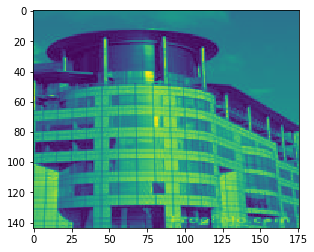

[1.02325474e-02 9.38602050e-03 1.10111247e-02 1.79974524e-02
 1.17656345e-02 9.14105901e-03 5.76630894e-03 5.18027336e-03
 5.53269666e-03 8.54442972e-03 5.76556131e-03 5.23246662e-03
 4.30229345e-03 4.03787372e-03 3.78284427e-03 5.21577586e-03
 3.92285323e-03 3.97488851e-03 7.07215326e-03 4.61737854e-03
 5.01214987e-03 1.28396782e-02 5.42079801e-03 4.34823868e-03
 1.66250039e-03 1.09327377e-03 1.21318224e-03 3.15662306e-03
 1.36735511e-03 1.05324315e-03 8.12817654e-04 6.07855636e-04
 6.55114196e-04 1.30036608e-03 6.79849933e-04 6.40524492e-04
 2.15946377e+00 4.31892754e+00 6.47839122e+00 8.63760516e+00
 1.07973188e+00 5.39865942e-01 3.59910446e-01 2.69770745e-01
 3.59910446e-01 1.65823467e-01 5.26715405e-02 3.32465602e-03]


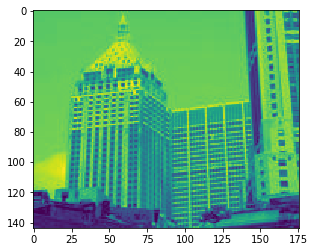

[1.32827217e-02 1.10235572e-02 1.01401772e-02 1.09211397e-02
 9.55277334e-03 1.02643437e-02 7.17724473e-03 6.19487052e-03
 6.37478594e-03 7.07842706e-03 5.90924271e-03 5.52512895e-03
 5.07348017e-03 4.88294520e-03 4.99998481e-03 5.55351179e-03
 4.48828070e-03 4.29357854e-03 8.21425951e-03 5.56806782e-03
 5.08598793e-03 5.91045167e-03 4.44769598e-03 5.11558671e-03
 2.10142514e-03 1.37651657e-03 1.31030596e-03 1.67911322e-03
 1.27137161e-03 1.33194622e-03 8.28727322e-04 6.57761301e-04
 7.15207028e-04 8.82387127e-04 6.62290364e-04 6.55816129e-04
 1.15660585e+00 2.31321170e+00 3.46981750e+00 4.62628954e+00
 5.78302924e-01 2.89151462e-01 1.92767544e-01 1.44488843e-01
 1.92767544e-01 8.88148225e-02 2.82108052e-02 2.47538359e-03]


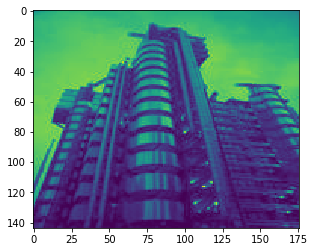

[1.08576130e-02 9.68825024e-03 9.52879849e-03 1.06258242e-02
 1.02497340e-02 1.01668062e-02 7.50463334e-03 7.04167121e-03
 6.58648405e-03 7.48401061e-03 7.25441457e-03 6.92462211e-03
 6.29418792e-03 6.09270479e-03 5.18546065e-03 5.65379324e-03
 5.51129417e-03 5.78659029e-03 5.09095513e-03 4.00619807e-03
 3.56354776e-03 5.09334065e-03 4.63000824e-03 4.12075939e-03
 1.66094092e-03 1.39002067e-03 1.23570944e-03 1.85421190e-03
 1.64346396e-03 1.25933678e-03 8.58686632e-04 7.50513379e-04
 7.38097627e-04 1.01136548e-03 9.65634709e-04 6.81527240e-04
 1.67440036e+00 3.34880072e+00 5.02320101e+00 6.69740766e+00
 8.37200181e-01 4.18600090e-01 2.79066585e-01 2.09174258e-01
 2.79066585e-01 1.28575842e-01 4.08403455e-02 3.15631775e-03]


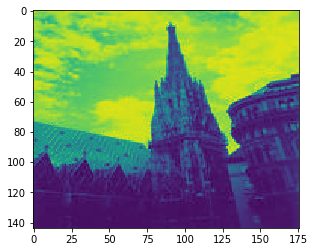

[1.92434804e-02 1.84577190e-02 1.36469423e-02 1.41770901e-02
 1.26183406e-02 1.38155314e-02 1.10787254e-02 1.08187817e-02
 7.41900982e-03 7.25681877e-03 6.90518304e-03 7.81911226e-03
 7.64947253e-03 7.56694144e-03 5.25038348e-03 5.34042788e-03
 5.01341768e-03 5.86763168e-03 1.04044703e-02 8.87623234e-03
 6.33067553e-03 9.30100248e-03 6.37587442e-03 5.98932593e-03
 3.06498609e-03 2.70040308e-03 1.59199144e-03 2.01875747e-03
 1.54440933e-03 1.68995550e-03 1.40425087e-03 1.37382188e-03
 7.78348630e-04 9.23908161e-04 7.24886882e-04 8.48170158e-04
 1.69009476e+00 3.38018953e+00 5.07028422e+00 6.76018346e+00
 8.45047382e-01 4.22523691e-01 2.81682318e-01 2.11134880e-01
 2.81682318e-01 1.29781002e-01 4.12231481e-02 2.84524746e-03]


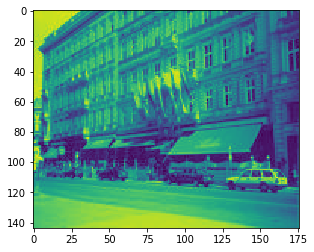

[1.62030482e-02 1.43999053e-02 1.24726611e-02 1.31483792e-02
 1.20786030e-02 1.30682696e-02 1.01990972e-02 8.94845017e-03
 7.30946410e-03 7.87945732e-03 6.88145216e-03 7.77044534e-03
 7.55220787e-03 6.61677143e-03 5.21378583e-03 5.42797215e-03
 4.86198191e-03 5.46841146e-03 8.67123834e-03 6.49626989e-03
 5.57003469e-03 7.25250926e-03 5.30276137e-03 5.44133026e-03
 2.77530525e-03 2.06115621e-03 1.62875909e-03 2.14559326e-03
 1.55156232e-03 1.70454155e-03 1.43683850e-03 1.07367995e-03
 8.19145476e-04 1.01887412e-03 8.08873198e-04 8.60980505e-04
 1.64094380e+00 3.28188760e+00 4.92283133e+00 6.56358528e+00
 8.20471899e-01 4.10235950e-01 2.73490494e-01 2.04994701e-01
 2.73490494e-01 1.26006740e-01 4.00276415e-02 3.08835570e-03]


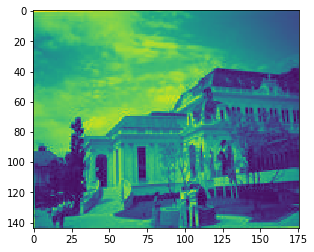

[1.45244165e-02 1.22833944e-02 1.12513852e-02 1.24842666e-02
 1.17108862e-02 1.25952012e-02 1.00292250e-02 7.76806633e-03
 6.66960937e-03 7.22153055e-03 6.62019769e-03 8.01281256e-03
 7.25195522e-03 5.57419986e-03 4.85014588e-03 5.06528411e-03
 4.72426282e-03 5.45701151e-03 7.59571813e-03 4.50323541e-03
 4.51673316e-03 6.99515184e-03 4.74587718e-03 4.93192548e-03
 2.60355961e-03 1.54577452e-03 1.44546125e-03 2.10809389e-03
 1.51831938e-03 1.75916943e-03 1.45508808e-03 9.10372747e-04
 7.77450326e-04 9.75985628e-04 7.69020756e-04 9.54175446e-04
 1.75895879e+00 3.51791759e+00 5.27687631e+00 7.03563161e+00
 8.79479397e-01 4.39739699e-01 2.93159650e-01 2.19737710e-01
 2.93159650e-01 1.35069015e-01 4.29028126e-02 3.27172245e-03]


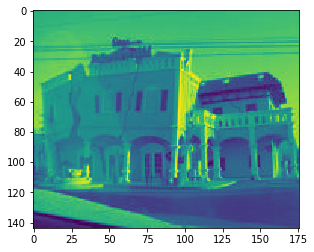

[1.59579261e-02 1.56677584e-02 1.50942504e-02 1.53838778e-02
 1.51157581e-02 1.42563119e-02 1.02515653e-02 1.06782725e-02
 9.83183871e-03 9.41663989e-03 9.71205156e-03 9.20547350e-03
 8.22193049e-03 8.87135933e-03 7.97128085e-03 6.90235204e-03
 7.25206508e-03 7.50204610e-03 8.65868277e-03 7.13758295e-03
 6.34929353e-03 7.79613249e-03 7.22319897e-03 5.67193710e-03
 2.65416359e-03 2.12141224e-03 1.99678366e-03 2.48893733e-03
 2.36534256e-03 1.72666392e-03 1.35479928e-03 1.17193800e-03
 1.08687134e-03 1.21737893e-03 1.23433326e-03 9.34529198e-04
 1.77688729e+00 3.55377458e+00 5.33066179e+00 7.10734352e+00
 8.88443645e-01 4.44221822e-01 2.96147731e-01 2.21977425e-01
 2.96147731e-01 1.36445730e-01 4.33401070e-02 3.71574222e-03]


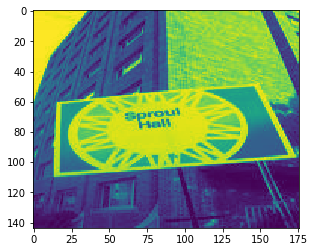

[1.62286676e-02 1.35901597e-02 1.14596829e-02 1.00844583e-02
 1.17004948e-02 1.42917709e-02 1.14104939e-02 9.45004454e-03
 7.74280416e-03 6.43575894e-03 7.74801556e-03 9.83768619e-03
 8.98472101e-03 7.98605857e-03 5.50702994e-03 4.63072251e-03
 5.57776605e-03 8.17483242e-03 8.59950197e-03 4.83207315e-03
 4.01708053e-03 5.31446569e-03 4.21488106e-03 5.08764592e-03
 2.91301226e-03 1.73231384e-03 1.35457053e-03 1.81203384e-03
 1.46694001e-03 1.84939897e-03 1.62922253e-03 9.88084938e-04
 7.89096450e-04 9.65001026e-04 8.36635904e-04 1.03563922e-03
 1.77916924e+00 3.55833847e+00 5.33750763e+00 7.11647104e+00
 8.89584618e-01 4.44792309e-01 2.96528056e-01 2.22262497e-01
 2.96528056e-01 1.36620959e-01 4.33962258e-02 3.62915093e-03]


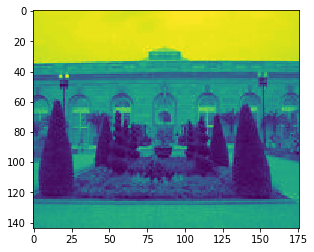

[1.14058599e-02 1.06549906e-02 1.03068936e-02 1.06543499e-02
 1.00445153e-02 1.02737708e-02 8.11171119e-03 7.06050260e-03
 6.78487056e-03 6.75507938e-03 6.39164115e-03 6.91239153e-03
 6.15817531e-03 5.62996978e-03 5.41951071e-03 5.04596480e-03
 5.11341574e-03 5.70289590e-03 5.84423218e-03 3.97415524e-03
 4.03541733e-03 5.89518102e-03 4.06046405e-03 3.85753933e-03
 2.18902237e-03 1.45801715e-03 1.41492861e-03 2.03008181e-03
 1.34856065e-03 1.34321601e-03 1.12914786e-03 8.37864731e-04
 8.23792863e-04 9.51120255e-04 7.37605548e-04 7.88444424e-04
 2.13438278e+00 4.26876557e+00 6.40314826e+00 8.53728412e+00
 1.06719139e+00 5.33595696e-01 3.55730284e-01 2.66637506e-01
 3.55730284e-01 1.63897518e-01 5.20597895e-02 3.39192619e-03]


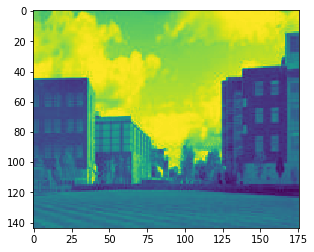

[1.16393802e-02 1.18584260e-02 1.48278266e-02 1.92035453e-02
 1.55624273e-02 1.25388270e-02 6.80357342e-03 6.77995494e-03
 8.28221788e-03 1.11961151e-02 9.15807808e-03 6.86468398e-03
 4.92020806e-03 4.91632868e-03 5.48849853e-03 7.61866193e-03
 6.36822585e-03 4.60554558e-03 6.73982699e-03 5.13664088e-03
 6.36399867e-03 1.15271017e-02 6.84140975e-03 5.31858101e-03
 1.73877983e-03 1.49381946e-03 2.01565773e-03 3.40622832e-03
 2.27789593e-03 1.58600496e-03 8.13265901e-04 7.66354279e-04
 1.02722086e-03 1.64574089e-03 1.22976694e-03 7.93060562e-04
 2.05848418e+00 4.11696835e+00 6.17545244e+00 8.23369847e+00
 1.02924209e+00 5.14621044e-01 3.43080522e-01 2.57155881e-01
 3.43080522e-01 1.58069326e-01 5.02085444e-02 3.35900349e-03]


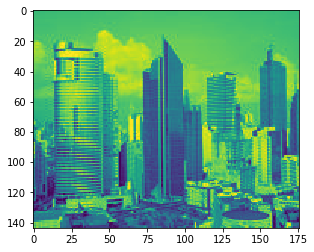

[2.27477963e-02 1.44737375e-02 1.05258970e-02 1.06517191e-02
 1.31402307e-02 2.07901149e-02 1.37073541e-02 7.67197385e-03
 7.06356192e-03 7.49856090e-03 7.26270043e-03 1.12680961e-02
 8.67426194e-03 5.43329721e-03 5.29131741e-03 5.94648710e-03
 5.14295927e-03 6.94340634e-03 1.20769901e-02 4.70907784e-03
 3.46303608e-03 5.52372698e-03 4.63493491e-03 9.20235764e-03
 4.53586835e-03 1.43878491e-03 1.32222813e-03 2.06080017e-03
 1.52170511e-03 3.07114348e-03 2.06506282e-03 7.38435218e-04
 7.60341428e-04 1.11512229e-03 8.68125065e-04 1.43070449e-03
 1.26823655e+00 2.53647309e+00 3.80470958e+00 5.07279940e+00
 6.34118273e-01 3.17059136e-01 2.11372650e-01 1.58434294e-01
 2.11372650e-01 9.73868529e-02 3.09335926e-02 3.00803290e-03]


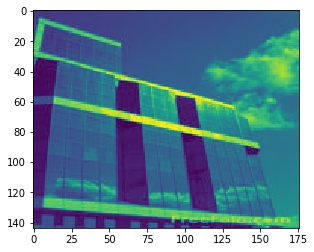

[9.57503449e-03 1.17291746e-02 1.73952798e-02 2.32270255e-02
 1.70762458e-02 1.14143052e-02 6.27306445e-03 6.93027098e-03
 1.07368288e-02 1.48174109e-02 9.88379111e-03 6.72370330e-03
 4.93238274e-03 5.31486249e-03 7.52418577e-03 1.02741986e-02
 6.91695703e-03 5.26939578e-03 4.98257846e-03 4.29740775e-03
 6.80188406e-03 1.34289803e-02 6.88049312e-03 4.29262194e-03
 1.57741231e-03 1.35176444e-03 2.33313062e-03 4.76874449e-03
 2.21671392e-03 1.22491225e-03 7.79095055e-04 7.11504030e-04
 1.26529529e-03 2.26807835e-03 1.04625808e-03 6.30956015e-04
 1.46531596e+00 2.93063191e+00 4.39594780e+00 5.86109424e+00
 7.32657978e-01 3.66328989e-01 2.44219202e-01 1.83054415e-01
 2.44219202e-01 1.12520421e-01 3.57405620e-02 3.02691015e-03]


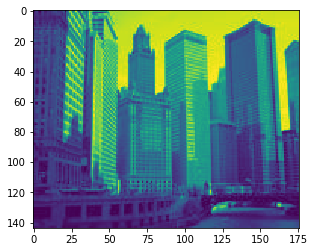

[8.43960510e-03 8.19404898e-03 9.41660413e-03 1.14431428e-02
 9.62205663e-03 8.32988975e-03 5.56229239e-03 5.54845262e-03
 6.21338100e-03 7.25361416e-03 6.16523223e-03 5.61656076e-03
 4.37943238e-03 4.52414602e-03 4.84583477e-03 5.32617668e-03
 4.70591917e-03 4.30892251e-03 4.44166924e-03 3.68283066e-03
 3.89442467e-03 6.38819909e-03 3.79763947e-03 3.05663190e-03
 1.26776370e-03 1.03603945e-03 1.27127900e-03 2.04703612e-03
 1.18885378e-03 9.89292710e-04 6.37896971e-04 6.68658187e-04
 7.49257007e-04 9.65809211e-04 7.29546252e-04 6.27923479e-04
 2.28328090e+00 4.56656180e+00 6.84984261e+00 9.13285936e+00
 1.14164045e+00 5.70820226e-01 3.80546624e-01 2.85238585e-01
 3.80546624e-01 1.75331284e-01 5.56915676e-02 3.36140102e-03]


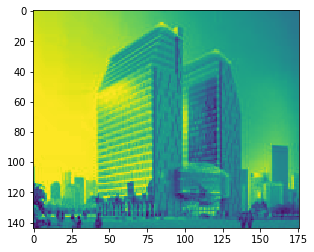

[1.47781038e-02 1.35569610e-02 1.45943650e-02 1.64424838e-02
 1.49052857e-02 1.33865981e-02 9.08605667e-03 8.15343268e-03
 8.67055511e-03 1.03387697e-02 9.06447523e-03 8.06033006e-03
 6.64656654e-03 5.77837232e-03 6.24402907e-03 8.06445395e-03
 6.65829254e-03 5.71477787e-03 8.05549521e-03 5.73589587e-03
 6.80282834e-03 9.76361337e-03 6.99713146e-03 5.34547587e-03
 2.45416578e-03 1.84989951e-03 1.79692614e-03 2.88780836e-03
 1.88798960e-03 1.61786780e-03 1.21823794e-03 9.46084208e-04
 9.39360647e-04 1.48986420e-03 1.02446853e-03 8.43444652e-04
 1.45365974e+00 2.90731948e+00 4.36097916e+00 5.81447073e+00
 7.26829870e-01 3.63414935e-01 2.42276501e-01 1.81598264e-01
 2.42276501e-01 1.11625349e-01 3.54562549e-02 3.48591907e-03]


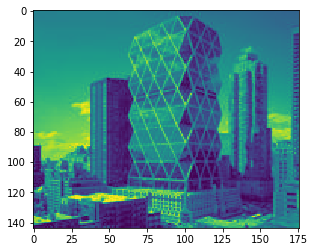

[1.13082359e-02 1.01018148e-02 9.31208133e-03 9.98177189e-03
 1.05963076e-02 1.06119703e-02 7.20624891e-03 5.86206264e-03
 5.41503309e-03 6.34738552e-03 6.20814147e-03 6.41896081e-03
 5.19350570e-03 4.44280740e-03 3.74411975e-03 4.35068876e-03
 3.95983476e-03 4.67651443e-03 5.47879493e-03 4.30168215e-03
 4.34242840e-03 5.27973144e-03 5.09892042e-03 4.15334928e-03
 1.70071570e-03 1.17095048e-03 1.17756357e-03 1.78059870e-03
 1.52899479e-03 1.39084333e-03 8.21885813e-04 6.05483728e-04
 6.56834828e-04 9.49511521e-04 8.15559647e-04 7.45027090e-04
 1.57879239e+00 3.15758478e+00 4.73637710e+00 6.31498684e+00
 7.89396194e-01 3.94698097e-01 2.63131931e-01 1.97230444e-01
 2.63131931e-01 1.21234184e-01 3.85083688e-02 2.46864175e-03]


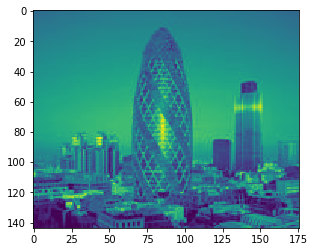

[1.16879405e-02 1.16884525e-02 1.49991673e-02 1.93533608e-02
 1.46744308e-02 1.17297740e-02 7.65936701e-03 6.61900216e-03
 8.38643658e-03 1.12251832e-02 8.38899247e-03 6.87065414e-03
 5.55341459e-03 4.47143354e-03 5.74095867e-03 7.40108291e-03
 5.73849215e-03 4.80179021e-03 6.60552310e-03 4.47163013e-03
 6.43332061e-03 1.15286400e-02 5.99615618e-03 4.61865209e-03
 2.02293124e-03 1.46545523e-03 2.00532548e-03 3.49070606e-03
 1.94188763e-03 1.49533344e-03 1.10744070e-03 7.54987307e-04
 1.03077558e-03 1.63328929e-03 1.03859233e-03 8.33970842e-04
 2.27773857e+00 4.55547714e+00 6.83321561e+00 9.11069066e+00
 1.13886928e+00 5.69434642e-01 3.79622902e-01 2.84546209e-01
 3.79622902e-01 1.74905692e-01 5.55563844e-02 3.71435354e-03]


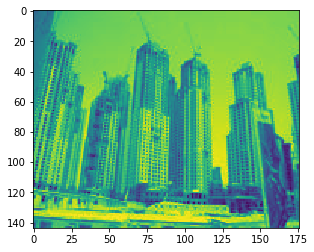

[1.55006805e-02 1.47751146e-02 1.58649824e-02 1.88811257e-02
 1.72906133e-02 1.56633041e-02 8.86113141e-03 8.22921579e-03
 8.74236122e-03 1.05613421e-02 9.58319511e-03 8.57498095e-03
 6.21045571e-03 5.59545824e-03 5.67353144e-03 6.89456140e-03
 6.19211035e-03 5.74269431e-03 8.05084590e-03 6.74016464e-03
 7.10268717e-03 1.11711782e-02 8.00418288e-03 7.21971098e-03
 2.32204889e-03 2.01523775e-03 2.18732651e-03 3.23692918e-03
 2.56730849e-03 2.10531155e-03 1.10289935e-03 9.59315340e-04
 1.08987476e-03 1.51433848e-03 1.26303386e-03 9.91994033e-04
 1.73682014e+00 3.47364027e+00 5.21046034e+00 6.94707954e+00
 8.68410068e-01 4.34205034e-01 2.89469876e-01 2.16972041e-01
 2.89469876e-01 1.33369006e-01 4.23628280e-02 3.29869899e-03]


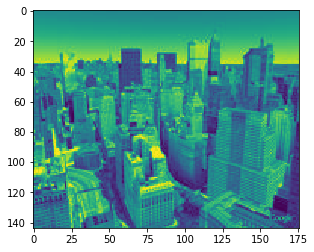

[2.14675427e-02 1.74493007e-02 1.76593068e-02 1.79012367e-02
 1.47914698e-02 1.70424333e-02 1.20172899e-02 9.53203466e-03
 1.00020316e-02 1.04242323e-02 8.74167147e-03 9.72374680e-03
 8.25353466e-03 7.37751966e-03 6.94676660e-03 7.25629545e-03
 6.87782460e-03 7.35994297e-03 1.29266389e-02 7.96760557e-03
 8.40936800e-03 1.01788731e-02 6.39901702e-03 7.66690846e-03
 3.83062212e-03 2.14707149e-03 2.60735413e-03 3.21437457e-03
 1.84142096e-03 2.30198326e-03 1.57442377e-03 1.01415834e-03
 1.20023305e-03 1.44105853e-03 9.08361659e-04 1.07635235e-03
 1.73679779e+00 3.47359558e+00 5.21039330e+00 6.94699016e+00
 8.68398896e-01 4.34199448e-01 2.89466152e-01 2.16969249e-01
 2.89466152e-01 1.33367290e-01 4.23622829e-02 3.59196515e-03]


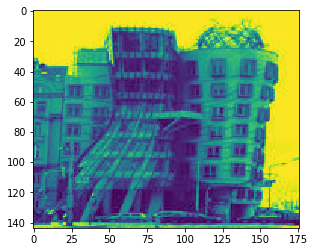

[1.51023263e-02 1.34474623e-02 1.33494731e-02 1.90386914e-02
 1.55133479e-02 1.49659493e-02 8.81215246e-03 8.47740326e-03
 9.44333050e-03 1.12364442e-02 1.11478288e-02 1.03871211e-02
 6.69954895e-03 6.24357518e-03 7.55145729e-03 8.98898574e-03
 9.11913769e-03 7.95597857e-03 9.04786874e-03 6.36947748e-03
 5.60337850e-03 1.39904829e-02 6.35979075e-03 6.85601045e-03
 2.24047624e-03 1.66388006e-03 1.79224330e-03 2.71543423e-03
 1.93542982e-03 2.00910330e-03 1.10751758e-03 9.26589506e-04
 1.12006082e-03 1.52919859e-03 1.23470157e-03 1.13885496e-03
 2.09481480e+00 4.18962960e+00 6.28444430e+00 8.37901675e+00
 1.04740740e+00 5.23703699e-01 3.49135622e-01 2.61694480e-01
 3.49135622e-01 1.60859125e-01 5.10946856e-02 4.60276420e-03]


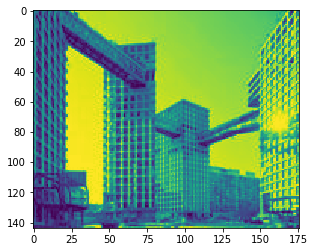

[7.83412822e-03 6.13697439e-03 4.73318019e-03 4.43662903e-03
 4.73491278e-03 6.10091673e-03 4.67239920e-03 3.72484890e-03
 2.81295617e-03 2.41196922e-03 2.77122099e-03 3.98691260e-03
 3.36675433e-03 2.92405567e-03 1.91224813e-03 1.56273122e-03
 1.91524645e-03 3.13433239e-03 4.43972653e-03 2.56812881e-03
 2.20676526e-03 2.79608431e-03 2.12540728e-03 2.43199381e-03
 1.24652912e-03 8.01379033e-04 6.43872681e-04 7.73352922e-04
 6.19175508e-04 8.30275622e-04 5.76212654e-04 4.35075210e-04
 3.91668198e-04 3.73709922e-04 3.90825144e-04 4.77320456e-04
 1.75770612e+00 3.51541225e+00 5.27311830e+00 7.03062107e+00
 8.78853062e-01 4.39426531e-01 2.92950872e-01 2.19581220e-01
 2.92950872e-01 1.34972824e-01 4.28722586e-02 2.45527407e-03]


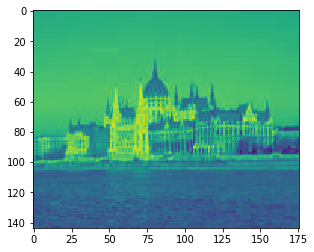

[7.65315655e-03 6.89743656e-03 7.03079610e-03 7.07112207e-03
 7.04239338e-03 7.17777501e-03 5.92428189e-03 4.91053205e-03
 4.53570780e-03 4.92953889e-03 4.73638648e-03 5.02352987e-03
 4.71004924e-03 3.84185410e-03 3.49998055e-03 3.74295526e-03
 3.64154763e-03 3.98129622e-03 3.13111980e-03 2.01794311e-03
 2.53585811e-03 3.53312186e-03 2.69494525e-03 2.10527033e-03
 1.25101579e-03 7.42527373e-04 8.40160433e-04 1.33168155e-03
 1.02999435e-03 8.19004876e-04 7.24402136e-04 5.04266578e-04
 5.31793428e-04 7.16235265e-04 6.44105020e-04 5.58016531e-04
 2.01396912e+00 4.02793825e+00 6.04190729e+00 8.05564341e+00
 1.00698456e+00 5.03492281e-01 3.35661350e-01 2.51594844e-01
 3.35661350e-01 1.54651051e-01 4.91227766e-02 3.19778553e-03]


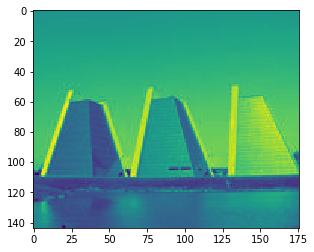

[1.32130460e-02 1.09451516e-02 9.35959027e-03 1.07743742e-02
 9.90391841e-03 1.20743319e-02 7.26351825e-03 6.34433924e-03
 5.26295124e-03 6.07362013e-03 5.63837768e-03 6.47823802e-03
 4.95807917e-03 4.52305497e-03 3.98289359e-03 4.27164443e-03
 4.26668910e-03 4.40254796e-03 7.44807204e-03 5.21999342e-03
 3.99691386e-03 6.02061414e-03 4.16128648e-03 5.82215896e-03
 2.13656575e-03 1.52140775e-03 1.11075721e-03 1.77455526e-03
 1.15591319e-03 1.65756933e-03 1.01462250e-03 8.09949233e-04
 6.29355601e-04 7.73441606e-04 6.16030318e-04 7.51149643e-04
 1.97403672e+00 3.94807344e+00 5.92211007e+00 7.89591841e+00
 9.87018359e-01 4.93509179e-01 3.29005953e-01 2.46606293e-01
 3.29005953e-01 1.51584674e-01 4.81487841e-02 2.98559484e-03]


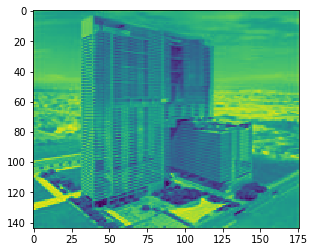

[1.10500559e-02 7.64435573e-03 8.63973648e-03 1.14255558e-02
 9.59526602e-03 8.31391026e-03 4.53772942e-03 4.23540331e-03
 5.04397289e-03 7.20231339e-03 6.09795787e-03 4.98823154e-03
 3.26231901e-03 2.94878715e-03 3.63954760e-03 5.26909152e-03
 4.43647029e-03 3.63599848e-03 9.81567699e-03 3.62626577e-03
 3.68612325e-03 7.07959848e-03 3.96637857e-03 4.05590332e-03
 1.27633548e-03 9.42603749e-04 1.10198925e-03 2.28611609e-03
 1.35019091e-03 1.08572905e-03 6.13842097e-04 5.32888317e-04
 6.23795976e-04 1.13647371e-03 7.59062278e-04 6.26993092e-04
 1.95914255e+00 3.91828510e+00 5.87742757e+00 7.83634347e+00
 9.79571276e-01 4.89785638e-01 3.26523593e-01 2.44745641e-01
 3.26523593e-01 1.50440963e-01 4.77855001e-02 2.83323443e-03]


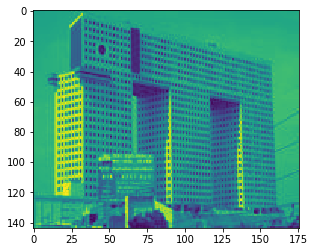

[1.05921099e-02 1.01545556e-02 1.08897459e-02 1.28860580e-02
 1.14147068e-02 1.03698845e-02 7.48910981e-03 7.06267579e-03
 6.89075037e-03 7.50800301e-03 7.22402833e-03 6.81911677e-03
 6.24243389e-03 6.02834126e-03 4.98888877e-03 5.28058881e-03
 5.20029416e-03 5.73089605e-03 5.29732787e-03 4.00787597e-03
 4.73984489e-03 7.48144173e-03 4.97924771e-03 4.55158051e-03
 1.53576400e-03 1.33710148e-03 1.52831758e-03 2.16199257e-03
 1.65647615e-03 1.38608527e-03 7.49814157e-04 7.68356921e-04
 8.73205987e-04 1.02136470e-03 9.53703606e-04 7.67739867e-04
 1.74282889e+00 3.48565778e+00 5.22848660e+00 6.97111387e+00
 8.71414446e-01 4.35707223e-01 2.90471335e-01 2.17722684e-01
 2.90471335e-01 1.33830413e-01 4.25101970e-02 2.83425558e-03]


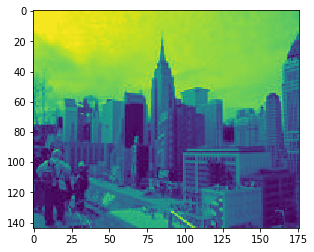

[2.00859681e-02 1.61256625e-02 1.54533802e-02 1.70019903e-02
 1.68166543e-02 1.84022135e-02 1.08481144e-02 9.56773674e-03
 8.55567935e-03 8.94950198e-03 9.59764109e-03 1.00809777e-02
 7.91048635e-03 7.29476207e-03 5.67613324e-03 5.80606581e-03
 6.70502061e-03 7.29787858e-03 1.20522081e-02 7.71941102e-03
 7.56950599e-03 1.02202574e-02 8.38786624e-03 9.56258556e-03
 2.86944525e-03 2.17427810e-03 2.15946117e-03 2.62800351e-03
 2.49481035e-03 2.39542501e-03 1.32265184e-03 1.11561246e-03
 1.00538962e-03 1.22886770e-03 1.24008420e-03 1.07898125e-03
 1.46611356e+00 2.93222712e+00 4.39834062e+00 5.86428456e+00
 7.33056780e-01 3.66528390e-01 2.44352136e-01 1.83154055e-01
 2.44352136e-01 1.12581668e-01 3.57600164e-02 3.15606406e-03]


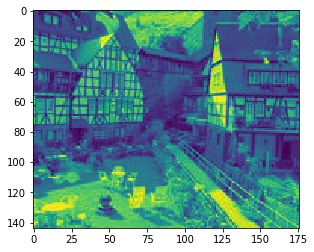

[1.25838883e-02 1.13908699e-02 9.94193831e-03 1.00820988e-02
 9.48414205e-03 1.07215345e-02 7.94338320e-03 7.36399020e-03
 6.38019700e-03 6.04124822e-03 6.11300271e-03 6.61805091e-03
 5.84766512e-03 5.66443144e-03 4.73763778e-03 4.42234057e-03
 4.72134355e-03 5.12379531e-03 7.04773188e-03 4.94315737e-03
 4.24084213e-03 6.02475090e-03 3.97882190e-03 4.85110232e-03
 2.17654212e-03 1.59146699e-03 1.34960359e-03 1.67842611e-03
 1.32245606e-03 1.44548671e-03 1.09577634e-03 8.65597618e-04
 7.59265942e-04 7.89274412e-04 7.25881572e-04 7.70187749e-04
 2.08436737e+00 4.16873475e+00 6.25310203e+00 8.33722826e+00
 1.04218369e+00 5.21091843e-01 3.47394386e-01 2.60389337e-01
 3.47394386e-01 1.60056876e-01 5.08398622e-02 3.13320695e-03]


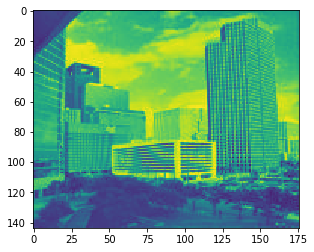

[1.06058261e-02 8.67096271e-03 8.64907126e-03 1.09691307e-02
 9.09328578e-03 9.03163671e-03 5.92860279e-03 5.19986746e-03
 5.29809657e-03 6.37275474e-03 5.99686043e-03 5.85149035e-03
 4.33557394e-03 3.80071658e-03 3.74470687e-03 4.63773504e-03
 4.56549928e-03 4.43532102e-03 7.26465177e-03 3.39412023e-03
 3.60644234e-03 7.81292704e-03 3.49157051e-03 3.56672675e-03
 1.89380018e-03 1.08468222e-03 1.14915336e-03 2.02935957e-03
 1.13279958e-03 1.17695754e-03 8.81097130e-04 6.30127700e-04
 6.61983481e-04 1.01928604e-03 6.90995099e-04 6.75149190e-04
 1.74707183e+00 3.49414367e+00 5.24121542e+00 6.98808514e+00
 8.73535917e-01 4.36767958e-01 2.91178491e-01 2.18252733e-01
 2.91178491e-01 1.34156225e-01 4.26128774e-02 2.78301805e-03]


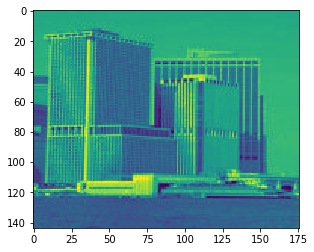

[1.26247050e-02 9.69180601e-03 9.06583259e-03 1.05793212e-02
 1.01171734e-02 1.12789325e-02 7.37893191e-03 5.76452658e-03
 5.29226348e-03 5.52273227e-03 5.80760936e-03 6.57332115e-03
 5.28403520e-03 4.57498065e-03 4.20972575e-03 4.00576998e-03
 4.56354542e-03 5.05025178e-03 6.71144438e-03 4.35094065e-03
 4.33847203e-03 7.10894471e-03 5.04998860e-03 5.07026610e-03
 2.00524126e-03 1.18658901e-03 1.18225734e-03 1.69068322e-03
 1.31930285e-03 1.41287515e-03 8.54576424e-04 5.71172045e-04
 5.50412906e-04 6.77242937e-04 6.59516067e-04 6.58781795e-04
 1.39981264e+00 2.79962528e+00 4.19943786e+00 5.59908855e+00
 6.99906320e-01 3.49953160e-01 2.33301988e-01 1.74871421e-01
 2.33301988e-01 1.07490474e-01 3.41428688e-02 2.40234364e-03]


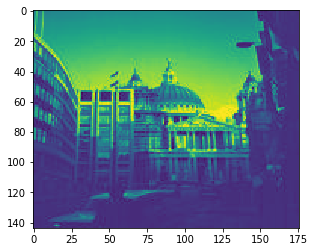

[1.15540372e-02 1.02230088e-02 9.05900388e-03 9.58261091e-03
 9.32758943e-03 1.02236462e-02 8.61526992e-03 7.21715047e-03
 5.59865921e-03 5.90381990e-03 5.74112206e-03 7.39667524e-03
 7.13809048e-03 6.04113540e-03 4.04855057e-03 4.07181199e-03
 4.22681405e-03 6.17535175e-03 5.54016312e-03 4.18869319e-03
 3.97113746e-03 5.02241667e-03 3.89181907e-03 4.13608805e-03
 1.89920675e-03 1.37102038e-03 1.21978279e-03 1.66613844e-03
 1.22368497e-03 1.42624472e-03 1.09156859e-03 8.05570130e-04
 6.61036044e-04 7.76664870e-04 6.80278808e-04 8.38954204e-04
 1.77691249e+00 3.55382498e+00 5.33073740e+00 7.10744432e+00
 8.88457057e-01 4.44228123e-01 2.96151932e-01 2.21980574e-01
 2.96151932e-01 1.36447665e-01 4.33407217e-02 3.04937659e-03]


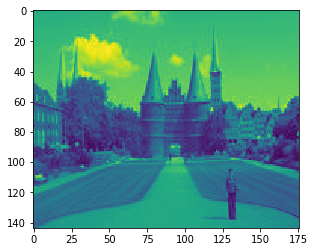

[1.28006030e-02 1.27516488e-02 1.51915792e-02 2.04358313e-02
 1.53372596e-02 1.28694793e-02 6.00083665e-03 5.79024199e-03
 6.75085549e-03 9.62644625e-03 7.12627291e-03 5.93591347e-03
 4.09498233e-03 3.84850555e-03 4.20090000e-03 5.93388733e-03
 4.76568217e-03 4.09288617e-03 7.87790128e-03 7.51278208e-03
 8.78290122e-03 1.35032671e-02 8.40226332e-03 7.65396818e-03
 1.82815184e-03 1.62826719e-03 1.86493886e-03 3.35429369e-03
 1.88263874e-03 1.62677352e-03 7.34370934e-04 6.66477137e-04
 7.70673277e-04 1.36796749e-03 8.27746229e-04 6.71944439e-04
 1.37217302e+00 2.74434605e+00 4.11651901e+00 5.48853329e+00
 6.86086512e-01 3.43043256e-01 2.28695388e-01 1.71418545e-01
 2.28695388e-01 1.05368051e-01 3.34687102e-02 2.43241345e-03]


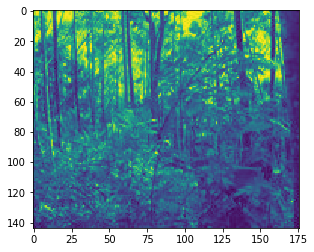

[6.90231991e-03 7.22362496e-03 9.52450011e-03 1.28936076e-02
 9.99607340e-03 7.73881694e-03 4.47637334e-03 4.37326174e-03
 4.92132454e-03 6.53897037e-03 5.30666421e-03 4.33641662e-03
 3.68595064e-03 3.59022171e-03 3.40803961e-03 4.47160569e-03
 3.55243016e-03 3.38068454e-03 3.37458667e-03 3.34438682e-03
 5.02504623e-03 8.14824475e-03 5.13599731e-03 3.88976338e-03
 8.82833626e-04 8.28553876e-04 1.15087910e-03 2.00151253e-03
 1.28087780e-03 8.86904959e-04 4.04730775e-04 4.19470725e-04
 5.62883781e-04 8.98504187e-04 6.01971050e-04 3.98407200e-04
 1.68262140e+00 3.36524279e+00 5.04786412e+00 6.73029085e+00
 8.41310699e-01 4.20655349e-01 2.80436757e-01 2.10201270e-01
 2.80436757e-01 1.29207129e-01 4.10408650e-02 2.41964265e-03]


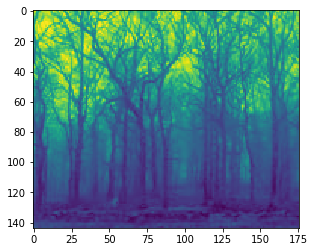

[1.10134753e-02 1.03675108e-02 1.23685533e-02 1.54481974e-02
 1.19914131e-02 1.10966604e-02 6.60134642e-03 5.72096668e-03
 6.09485686e-03 7.32004608e-03 5.99487314e-03 6.49403634e-03
 5.08087842e-03 4.18604934e-03 3.91435485e-03 4.48302874e-03
 4.07851213e-03 4.77663602e-03 5.67051086e-03 5.02667265e-03
 6.46737160e-03 9.94872349e-03 6.12648477e-03 5.29906861e-03
 1.53328837e-03 1.23832076e-03 1.60008969e-03 2.45125702e-03
 1.46267628e-03 1.42394728e-03 7.53375272e-04 6.16326704e-04
 6.98772240e-04 1.00650654e-03 6.66697847e-04 6.86890251e-04
 1.19358876e+00 2.38717752e+00 3.58076623e+00 4.77421690e+00
 5.96794380e-01 2.98397190e-01 1.98931359e-01 1.49108928e-01
 1.98931359e-01 9.16547102e-02 2.91128564e-02 2.19489023e-03]


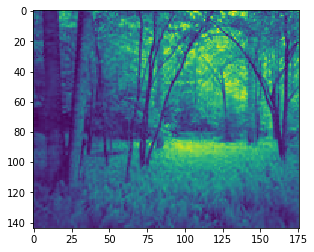

[1.40773909e-02 1.45852309e-02 1.91693416e-02 2.52684198e-02
 1.79067712e-02 1.41965850e-02 7.34417650e-03 7.91834042e-03
 9.92055329e-03 1.21595099e-02 8.65016512e-03 7.51185027e-03
 5.45421871e-03 5.91347451e-03 6.73808811e-03 7.82541647e-03
 6.01765431e-03 5.38609700e-03 8.11459080e-03 7.28235613e-03
 9.90587737e-03 1.55473093e-02 9.09675557e-03 7.57734775e-03
 1.99515952e-03 1.81617398e-03 2.51581034e-03 4.13033559e-03
 2.14395674e-03 1.85737483e-03 8.80648118e-04 8.61973151e-04
 1.19374108e-03 1.69157665e-03 1.01402623e-03 8.60082318e-04
 1.28081497e+00 2.56162994e+00 3.84244486e+00 5.12311166e+00
 6.40407486e-01 3.20203743e-01 2.13469054e-01 1.60005652e-01
 2.13469054e-01 9.83527401e-02 3.12403934e-02 2.93730744e-03]


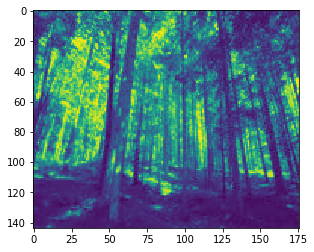

[1.41724918e-02 1.49213216e-02 1.81794078e-02 2.12232853e-02
 1.74395783e-02 1.46129763e-02 6.99673044e-03 7.76746184e-03
 9.45309325e-03 1.17581506e-02 8.95264515e-03 7.02215903e-03
 4.43884533e-03 4.87338985e-03 6.25584381e-03 7.49978272e-03
 5.82216659e-03 4.45967116e-03 7.50371335e-03 7.33214776e-03
 8.68675457e-03 1.15019839e-02 8.58189937e-03 7.51162633e-03
 2.04136664e-03 2.04056614e-03 2.48187737e-03 3.76810315e-03
 2.47266445e-03 2.00031256e-03 9.01286684e-04 9.29262584e-04
 1.19080638e-03 1.69138462e-03 1.15119131e-03 8.84175132e-04
 1.48719139e+00 2.97438278e+00 4.46157411e+00 5.94859345e+00
 7.43595695e-01 3.71797848e-01 2.47865106e-01 1.85787201e-01
 2.47865106e-01 1.14200217e-01 3.62741263e-02 2.64365271e-03]


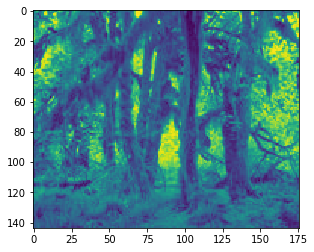

[1.18325102e-02 1.18810553e-02 1.14985268e-02 1.16561905e-02
 1.15751096e-02 1.14951334e-02 6.43050936e-03 6.87910305e-03
 6.56657906e-03 6.56957474e-03 6.87489316e-03 6.36030377e-03
 4.46236556e-03 4.82433192e-03 4.66126223e-03 4.67420709e-03
 5.12464185e-03 4.59927486e-03 6.18209038e-03 5.86858688e-03
 5.84809927e-03 6.12940826e-03 5.65095219e-03 6.02662050e-03
 1.64462744e-03 1.71909580e-03 1.63882345e-03 1.60562528e-03
 1.67520383e-03 1.57014058e-03 7.93370086e-04 8.65583863e-04
 8.26864588e-04 7.87998831e-04 8.45836731e-04 7.61653519e-04
 1.26893546e+00 2.53787093e+00 3.80680634e+00 5.07559500e+00
 6.34467732e-01 3.17233866e-01 2.11489137e-01 1.58521606e-01
 2.11489137e-01 9.74405224e-02 3.09506400e-02 2.40449527e-03]


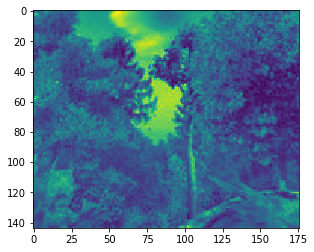

[1.41094740e-02 1.19972558e-02 1.00330501e-02 1.00153814e-02
 1.01691490e-02 1.25135975e-02 6.86772197e-03 5.71522770e-03
 4.66229721e-03 4.79198551e-03 4.75865636e-03 5.69613951e-03
 4.35921088e-03 3.73262865e-03 3.04328096e-03 3.18963290e-03
 3.06001230e-03 3.56608240e-03 8.68611598e-03 6.83644927e-03
 5.62491441e-03 6.16363571e-03 5.73891786e-03 7.29187724e-03
 2.12353238e-03 1.64974971e-03 1.32613390e-03 1.42227671e-03
 1.32312976e-03 1.67847280e-03 9.00315167e-04 7.27208398e-04
 5.80138230e-04 5.93835447e-04 5.71303279e-04 6.93955905e-04
 1.37838246e+00 2.75676492e+00 4.13514732e+00 5.51337031e+00
 6.89191230e-01 3.44595615e-01 2.29730293e-01 1.72194258e-01
 2.29730293e-01 1.05844868e-01 3.36201647e-02 2.08413695e-03]


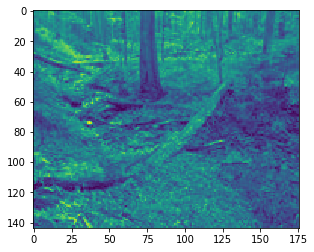

[1.64384849e-02 1.49941413e-02 1.99397330e-02 2.83471467e-02
 1.96918891e-02 1.55037956e-02 7.09529228e-03 5.98640696e-03
 8.37562395e-03 1.44665218e-02 8.27401178e-03 6.92133559e-03
 4.01044525e-03 3.49214529e-03 4.87713421e-03 8.53655449e-03
 4.70205930e-03 4.03754135e-03 1.02951618e-02 8.45621262e-03
 1.04461150e-02 1.69598482e-02 9.91461919e-03 8.50659090e-03
 2.51853819e-03 1.81734246e-03 2.30428625e-03 5.35311443e-03
 2.25547025e-03 2.04294748e-03 9.67851948e-04 7.43213462e-04
 8.69425219e-04 2.22143719e-03 8.93084476e-04 8.88239168e-04
 1.17006778e+00 2.34013557e+00 3.51020330e+00 4.68013572e+00
 5.85033891e-01 2.92516946e-01 1.95011198e-01 1.46170573e-01
 1.95011198e-01 8.98485535e-02 2.85391556e-02 2.20990134e-03]


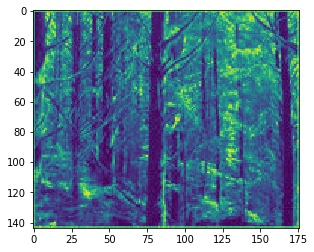

[1.11541109e-02 1.19407809e-02 1.77131057e-02 2.62468818e-02
 1.75394579e-02 1.18696070e-02 4.98382102e-03 5.09911804e-03
 8.57745981e-03 1.45007957e-02 8.17485183e-03 4.98456701e-03
 3.10041954e-03 3.11286117e-03 5.59376562e-03 9.09169160e-03
 5.00731722e-03 3.05987753e-03 7.30541122e-03 6.21311376e-03
 8.30521799e-03 1.69612833e-02 7.85129184e-03 6.30135233e-03
 1.61071088e-03 1.31752986e-03 2.04536217e-03 4.96502182e-03
 1.97802601e-03 1.25721103e-03 6.67331999e-04 5.25161916e-04
 9.13269327e-04 2.28647527e-03 7.82506476e-04 5.43929648e-04
 1.68106219e+00 3.36212438e+00 5.04318649e+00 6.72405420e+00
 8.40531094e-01 4.20265547e-01 2.80176889e-01 2.10006486e-01
 2.80176889e-01 1.29087398e-01 4.10028343e-02 2.87662343e-03]


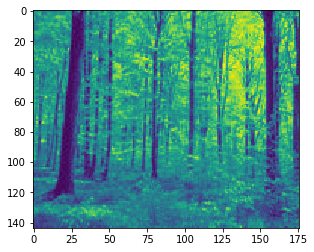

[1.15778712e-02 1.09405283e-02 1.07871616e-02 1.31337901e-02
 1.19421815e-02 1.21156673e-02 6.29803552e-03 6.47130304e-03
 6.78712347e-03 7.79516265e-03 6.96285989e-03 6.84409624e-03
 4.43870794e-03 4.87052449e-03 5.64837923e-03 5.98620012e-03
 5.45408966e-03 4.62264286e-03 6.06524551e-03 5.36390728e-03
 5.00615625e-03 7.22449273e-03 5.33156166e-03 6.08562678e-03
 1.56510622e-03 1.36159688e-03 1.26291778e-03 2.02094876e-03
 1.42033505e-03 1.76793075e-03 7.30702243e-04 6.71188770e-04
 6.80997858e-04 9.24294307e-04 7.43176798e-04 8.18085043e-04
 1.42517069e+00 2.85034138e+00 4.27551201e+00 5.70051782e+00
 7.12585345e-01 3.56292673e-01 2.37528328e-01 1.78039272e-01
 2.37528328e-01 1.09437698e-01 3.47613777e-02 2.63661441e-03]


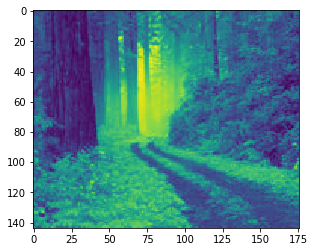

[9.99549302e-03 9.55016995e-03 1.21871715e-02 1.83112732e-02
 1.18563723e-02 9.09656887e-03 5.16277170e-03 4.54243122e-03
 4.80192967e-03 7.92282373e-03 4.82266822e-03 4.34261933e-03
 3.51586206e-03 3.02207795e-03 2.98063626e-03 4.20649713e-03
 2.94614572e-03 3.03531317e-03 6.13519170e-03 5.51039919e-03
 6.70836976e-03 1.27695582e-02 6.50166683e-03 5.31046841e-03
 1.49587398e-03 1.19613264e-03 1.37272711e-03 3.11702786e-03
 1.44411158e-03 1.10859251e-03 6.51971869e-04 5.14484197e-04
 5.13182188e-04 1.14574325e-03 5.43212989e-04 4.98676468e-04
 1.35037446e+00 2.70074893e+00 4.05112333e+00 5.40134157e+00
 6.75187231e-01 3.37593616e-01 2.25062296e-01 1.68695363e-01
 2.25062296e-01 1.03694157e-01 3.29370209e-02 2.08855443e-03]


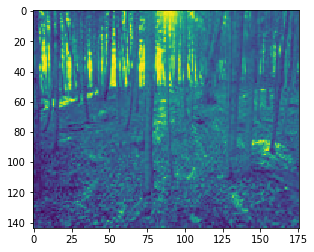

[1.72693163e-02 1.49731468e-02 1.49455122e-02 1.82798861e-02
 1.67405565e-02 1.66372108e-02 8.66609989e-03 6.96568658e-03
 7.89229219e-03 1.04065750e-02 9.39134241e-03 8.82941339e-03
 5.69061935e-03 4.39401581e-03 5.48105096e-03 7.21087606e-03
 6.57996098e-03 6.00740015e-03 1.04199555e-02 8.32818877e-03
 7.53950405e-03 1.09538153e-02 7.96161735e-03 8.71249159e-03
 2.54672612e-03 1.92594396e-03 1.93899429e-03 2.96184533e-03
 2.08389367e-03 2.21799393e-03 1.10147474e-03 7.73100578e-04
 9.23291938e-04 1.42300177e-03 1.03221355e-03 1.04182473e-03
 1.41348180e+00 2.82696360e+00 4.24044534e+00 5.65376361e+00
 7.06740900e-01 3.53370450e-01 2.35580180e-01 1.76579039e-01
 2.35580180e-01 1.08540118e-01 3.44762737e-02 3.09342284e-03]


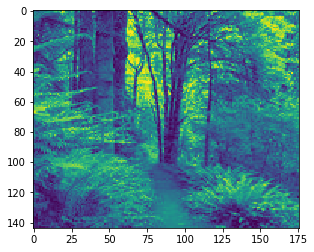

[1.55874008e-02 1.51967601e-02 1.51588776e-02 1.57909732e-02
 1.37769851e-02 1.38006278e-02 7.37343931e-03 6.99920206e-03
 8.04933833e-03 9.63907364e-03 7.35582341e-03 6.39300820e-03
 4.37751270e-03 4.42920637e-03 5.62538782e-03 6.90825510e-03
 5.16996962e-03 4.12989009e-03 9.23185636e-03 8.47119956e-03
 7.65079581e-03 8.43011608e-03 6.87138249e-03 7.60287708e-03
 2.45615255e-03 1.98948051e-03 2.00312491e-03 2.56427930e-03
 1.76709775e-03 1.78566602e-03 9.88754808e-04 8.43381230e-04
 9.13851406e-04 1.28267095e-03 8.13331830e-04 8.10748218e-04
 1.52329369e+00 3.04658738e+00 4.56988101e+00 6.09299847e+00
 7.61646845e-01 3.80823423e-01 2.53882153e-01 1.90297276e-01
 2.53882153e-01 1.16972484e-01 3.71546985e-02 2.64179751e-03]


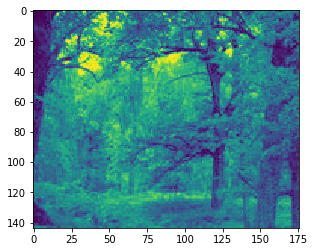

[5.74732595e-03 8.24757514e-03 1.67497820e-02 3.29414889e-02
 1.65094595e-02 8.02157161e-03 2.74579805e-03 3.52773223e-03
 6.72700463e-03 1.14761827e-02 6.73304624e-03 3.45897664e-03
 1.81692770e-03 2.17447810e-03 4.04163171e-03 6.04552951e-03
 3.92399147e-03 2.15617829e-03 2.92244901e-03 3.66003482e-03
 8.77211439e-03 2.65198116e-02 8.54381078e-03 3.62142003e-03
 7.90700436e-04 8.49806775e-04 1.97082121e-03 4.65839856e-03
 1.98212346e-03 8.43732288e-04 3.39327115e-04 3.74970753e-04
 8.39340269e-04 1.57282119e-03 8.60309173e-04 3.76939390e-04
 1.40703318e+00 2.81406636e+00 4.22109948e+00 5.62796988e+00
 7.03516590e-01 3.51758295e-01 2.34505411e-01 1.75773446e-01
 2.34505411e-01 1.08044934e-01 3.43189852e-02 2.07881378e-03]


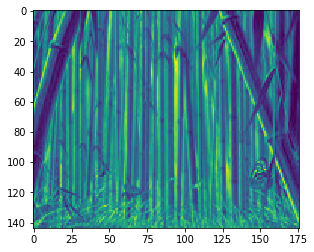

[1.27782901e-02 1.38750476e-02 1.61758643e-02 1.75562898e-02
 1.34862371e-02 1.22263750e-02 8.43612858e-03 8.27998310e-03
 9.46791739e-03 1.04286748e-02 7.35291661e-03 7.55081874e-03
 6.68920211e-03 5.88401926e-03 6.39719208e-03 7.08772679e-03
 4.90591534e-03 5.76769154e-03 6.17979270e-03 5.77022105e-03
 7.04041152e-03 9.06723882e-03 5.70002822e-03 5.29061445e-03
 1.76909251e-03 1.59435436e-03 2.23175316e-03 2.89508606e-03
 1.52245433e-03 1.46384744e-03 1.02582186e-03 8.03249413e-04
 1.13896274e-03 1.44096419e-03 7.04788397e-04 8.04485334e-04
 1.40321887e+00 2.80643775e+00 4.20965656e+00 5.61271310e+00
 7.01609437e-01 3.50804718e-01 2.33869694e-01 1.75296944e-01
 2.33869694e-01 1.07752036e-01 3.42259503e-02 3.36928267e-03]


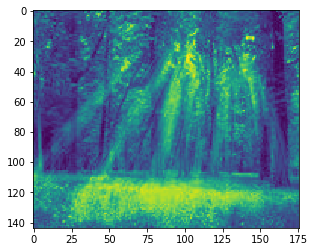

[8.59500303e-03 9.13831058e-03 1.10350929e-02 1.31647175e-02
 1.10902223e-02 8.88930967e-03 5.08414161e-03 5.31628229e-03
 6.08389166e-03 8.14891420e-03 6.52055771e-03 5.03312096e-03
 3.82876147e-03 4.06826561e-03 4.25540874e-03 5.72602527e-03
 4.75365300e-03 3.69769495e-03 4.36799364e-03 4.46335633e-03
 5.07924306e-03 6.75747913e-03 5.04407556e-03 4.03431476e-03
 1.13039181e-03 1.14089034e-03 1.35281156e-03 2.29138149e-03
 1.46926321e-03 1.01964739e-03 5.42154314e-04 5.97994588e-04
 6.27046400e-04 1.12796192e-03 7.50922932e-04 4.74065066e-04
 1.24790022e+00 2.49580043e+00 3.74370059e+00 4.99145644e+00
 6.23950108e-01 3.11975054e-01 2.07983264e-01 1.55893780e-01
 2.07983264e-01 9.58252427e-02 3.04375686e-02 2.20910794e-03]


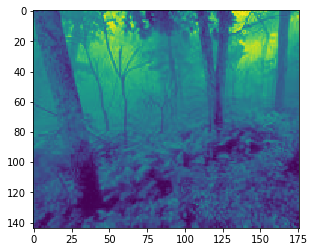

[8.39979187e-03 7.63919481e-03 7.19641178e-03 8.09363257e-03
 7.47660073e-03 7.76910005e-03 5.03084957e-03 4.37587827e-03
 4.04791423e-03 4.20960248e-03 4.06283100e-03 4.65450921e-03
 3.95167071e-03 3.47451847e-03 2.84204198e-03 2.92427109e-03
 2.93114380e-03 3.74435365e-03 4.38972922e-03 3.94370798e-03
 3.75827278e-03 4.68345550e-03 3.75567291e-03 3.84928653e-03
 1.00466684e-03 8.86993293e-04 9.84514854e-04 1.18058926e-03
 9.43438821e-04 8.95090689e-04 4.44869189e-04 4.18056240e-04
 4.99852493e-04 5.29813527e-04 4.47649533e-04 4.32153777e-04
 1.58831399e+00 3.17662798e+00 4.76494191e+00 6.35307215e+00
 7.94156996e-01 3.97078498e-01 2.64718864e-01 1.98419929e-01
 2.64718864e-01 1.21965340e-01 3.87406105e-02 2.29909535e-03]


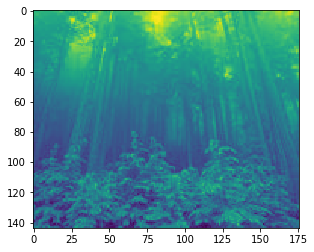

[5.43922245e-03 6.04910727e-03 8.42339891e-03 1.47611298e-02
 1.02850313e-02 6.73997493e-03 3.07856547e-03 3.43197822e-03
 4.20847102e-03 7.41620835e-03 5.00816663e-03 3.30492069e-03
 2.18282141e-03 2.52478691e-03 2.80970531e-03 4.63327346e-03
 3.12632811e-03 2.17161936e-03 2.82187727e-03 2.95635339e-03
 3.62812164e-03 9.51147327e-03 4.92459191e-03 3.14141449e-03
 7.53388500e-04 7.90701698e-04 8.70979808e-04 2.57048048e-03
 1.16657642e-03 8.23305721e-04 3.74423834e-04 4.08245865e-04
 4.11979529e-04 1.02001332e-03 5.73638583e-04 3.92925009e-04
 1.19839170e+00 2.39678339e+00 3.59517504e+00 4.79342809e+00
 5.99195848e-01 2.99597924e-01 1.99731848e-01 1.49708935e-01
 1.99731848e-01 9.20235237e-02 2.92300050e-02 1.79750078e-03]


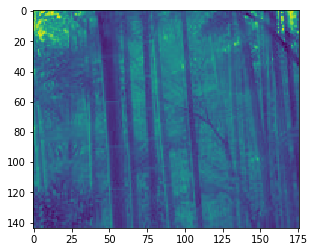

[9.86688896e-03 8.17350944e-03 5.69502577e-03 4.71587835e-03
 6.02226327e-03 8.61744444e-03 6.81407958e-03 5.34830759e-03
 3.32484541e-03 2.13697795e-03 3.27816673e-03 5.75416456e-03
 5.43096644e-03 4.26750026e-03 2.37791416e-03 1.52555514e-03
 2.16459994e-03 4.52404618e-03 4.77788796e-03 3.53753830e-03
 2.89293834e-03 3.28354021e-03 2.97840953e-03 3.81693136e-03
 1.58745093e-03 9.44636579e-04 6.09655763e-04 5.73583670e-04
 6.70420946e-04 1.14252946e-03 8.94721701e-04 5.44396716e-04
 3.46260515e-04 2.38496361e-04 3.71387542e-04 6.79036509e-04
 1.93308004e+00 3.86616008e+00 5.79924003e+00 7.73209644e+00
 9.66540020e-01 4.83270010e-01 3.22179843e-01 2.41489785e-01
 3.22179843e-01 1.48439644e-01 4.71498087e-02 2.92777072e-03]


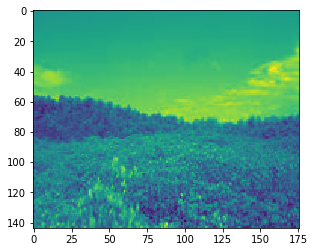

[1.11003210e-02 1.11387111e-02 1.35478244e-02 2.02857880e-02
 1.31418510e-02 1.04103512e-02 5.39763574e-03 5.23997871e-03
 5.88454897e-03 9.52650142e-03 5.96026513e-03 5.00125788e-03
 3.65356612e-03 3.51753383e-03 3.84390253e-03 5.67255781e-03
 3.85533839e-03 3.44050967e-03 7.28744798e-03 6.47453725e-03
 7.30623279e-03 1.43138442e-02 6.78287814e-03 5.89791225e-03
 1.52803649e-03 1.44500044e-03 1.56454073e-03 3.48089361e-03
 1.50703072e-03 1.26692350e-03 6.58756918e-04 6.20766268e-04
 6.47507898e-04 1.42007440e-03 6.24155639e-04 5.84667798e-04
 1.39973696e+00 2.79947392e+00 4.19921082e+00 5.59878584e+00
 6.99868480e-01 3.49934240e-01 2.33289375e-01 1.74861967e-01
 2.33289375e-01 1.07484663e-01 3.41410229e-02 2.24797242e-03]


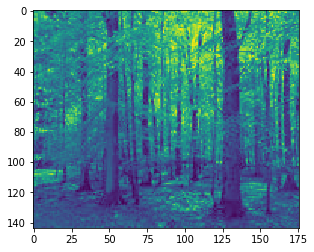

[1.33536738e-02 1.24077649e-02 1.21589713e-02 1.21383977e-02
 1.14095347e-02 1.26008695e-02 7.01052916e-03 6.70503737e-03
 6.81992744e-03 6.85098412e-03 5.96454852e-03 6.41603053e-03
 4.62062937e-03 4.62105909e-03 4.76590313e-03 4.61592105e-03
 3.93171718e-03 4.13076229e-03 7.70117152e-03 6.42758186e-03
 6.04913044e-03 6.47711707e-03 5.57599145e-03 6.49140635e-03
 2.07400200e-03 1.74853701e-03 1.60571389e-03 1.89339192e-03
 1.48843131e-03 1.69276429e-03 9.75216847e-04 8.27751542e-04
 7.86960547e-04 8.99333873e-04 6.96442658e-04 7.22005072e-04
 1.00697774e+00 2.01395548e+00 3.02093318e+00 4.02779443e+00
 5.03488871e-01 2.51744436e-01 1.67829539e-01 1.25796570e-01
 1.67829539e-01 7.73250019e-02 2.45612219e-02 2.10661086e-03]


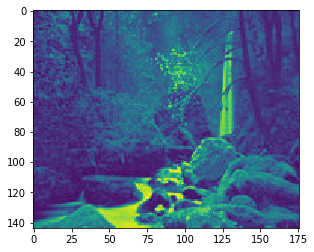

[1.41649382e-02 1.41298104e-02 1.56079409e-02 1.51776321e-02
 1.23326290e-02 1.24741103e-02 7.52506951e-03 8.09441661e-03
 8.84799820e-03 8.03411807e-03 6.46534293e-03 6.38313230e-03
 5.22994461e-03 6.02171065e-03 5.99445071e-03 5.32918293e-03
 4.42684016e-03 4.52753773e-03 7.90453626e-03 7.02211780e-03
 7.46626354e-03 7.92514100e-03 6.31414978e-03 6.70818463e-03
 1.99840142e-03 1.87714693e-03 2.36977766e-03 2.25158213e-03
 1.65624391e-03 1.58922893e-03 8.85241095e-04 9.30953088e-04
 1.11409868e-03 1.02842099e-03 7.65593351e-04 6.99408419e-04
 1.00121984e+00 2.00243968e+00 3.00365948e+00 4.00476349e+00
 5.00609920e-01 2.50304960e-01 1.66869889e-01 1.25077265e-01
 1.66869889e-01 7.68828573e-02 2.44207808e-02 2.30002884e-03]


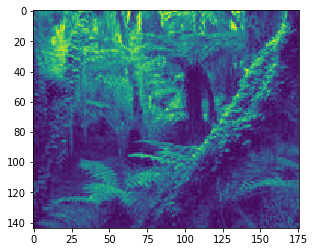

[9.84569414e-03 1.02901326e-02 1.27378619e-02 1.56653429e-02
 1.34802659e-02 1.08259009e-02 5.27950474e-03 5.67986216e-03
 8.03538741e-03 1.06302269e-02 8.69538529e-03 6.08136192e-03
 3.47467273e-03 3.78738900e-03 6.22197295e-03 8.06115651e-03
 6.51387557e-03 4.04326395e-03 5.31502656e-03 4.87477505e-03
 5.52457202e-03 8.40048174e-03 5.97121756e-03 4.86447760e-03
 1.52919551e-03 1.32813868e-03 1.62342080e-03 2.95621594e-03
 1.85813688e-03 1.38227961e-03 6.78806658e-04 6.21365387e-04
 8.88848550e-04 1.54429069e-03 1.00276358e-03 6.35378846e-04
 9.32287493e-01 1.86457499e+00 2.79686244e+00 3.72904208e+00
 4.66143747e-01 2.33071873e-01 1.55381170e-01 1.16465900e-01
 1.55381170e-01 7.15895984e-02 2.27394500e-02 2.70630623e-03]


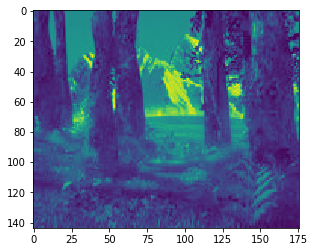

[1.20400326e-02 1.14603286e-02 1.08742017e-02 1.39447919e-02
 1.01792486e-02 1.01069837e-02 6.99769204e-03 6.42004935e-03
 5.66503965e-03 7.15103417e-03 5.26428945e-03 5.68499239e-03
 5.12031965e-03 4.53548602e-03 3.75563373e-03 4.69434348e-03
 3.48270829e-03 4.11765179e-03 6.46841655e-03 5.73453235e-03
 5.10628124e-03 8.97332120e-03 4.85556519e-03 4.71356523e-03
 1.84391330e-03 1.57015577e-03 1.35142782e-03 2.23036398e-03
 1.28180956e-03 1.31766420e-03 9.18988097e-04 7.49733736e-04
 6.63269870e-04 1.02064949e-03 5.80287222e-04 6.55746324e-04
 1.16525365e+00 2.33050729e+00 3.49576089e+00 4.66087972e+00
 5.82626823e-01 2.91313411e-01 1.94208842e-01 1.45569168e-01
 1.94208842e-01 8.94788798e-02 2.84217339e-02 2.15961249e-03]


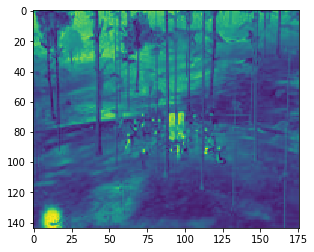

[1.35949511e-02 1.27065308e-02 1.24072779e-02 1.37042714e-02
 1.21010390e-02 1.31417656e-02 7.59005677e-03 6.60236031e-03
 6.66732467e-03 7.38359074e-03 6.62154365e-03 7.18762422e-03
 5.06684097e-03 4.19414733e-03 5.05813508e-03 5.43668268e-03
 5.26826675e-03 4.92108376e-03 7.51448471e-03 6.84292110e-03
 6.41314693e-03 8.09789483e-03 6.31869599e-03 7.26285304e-03
 2.10213023e-03 1.78832781e-03 1.50673019e-03 1.98261298e-03
 1.37573277e-03 1.90507326e-03 1.04648485e-03 7.80010255e-04
 7.01117851e-04 8.15824958e-04 6.57711441e-04 8.93441249e-04
 1.46387706e+00 2.92775412e+00 4.39163111e+00 5.85533882e+00
 7.31938529e-01 3.65969265e-01 2.43979386e-01 1.82874661e-01
 2.43979386e-01 1.12409929e-01 3.57054658e-02 2.35656038e-03]


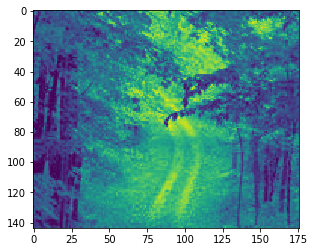

[1.14554381e-02 9.38349153e-03 7.79425197e-03 7.35116655e-03
 8.20447442e-03 1.01619802e-02 6.92496774e-03 5.61103387e-03
 5.13968882e-03 4.76807930e-03 5.11975472e-03 5.62228058e-03
 4.78303220e-03 4.04673706e-03 3.77736073e-03 3.61362303e-03
 3.85002831e-03 4.08945979e-03 6.02819077e-03 4.06387983e-03
 3.28833271e-03 3.37167813e-03 3.62091491e-03 4.91800442e-03
 2.02717124e-03 1.29850956e-03 1.18525041e-03 1.11414963e-03
 1.13797181e-03 1.41145182e-03 9.61353212e-04 6.30634433e-04
 6.89052498e-04 6.09184701e-04 6.12398263e-04 6.66575076e-04
 1.54204478e+00 3.08408956e+00 4.62613428e+00 6.16800066e+00
 7.71022391e-01 3.85511195e-01 2.57007333e-01 1.92639754e-01
 2.57007333e-01 1.18412365e-01 3.76120569e-02 2.60487954e-03]


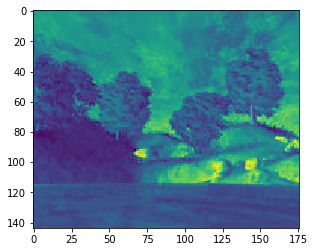

[7.86856778e-03 8.33925610e-03 1.05297475e-02 1.30081019e-02
 1.00852488e-02 8.24591658e-03 5.60321458e-03 5.52656892e-03
 6.55904247e-03 8.34577484e-03 6.87905824e-03 5.84365523e-03
 4.43611825e-03 4.26606004e-03 5.06326899e-03 6.19979106e-03
 5.57494280e-03 4.76895715e-03 3.21158517e-03 3.13546718e-03
 4.31941914e-03 6.09647198e-03 3.54924776e-03 2.97154170e-03
 1.04499252e-03 9.83068738e-04 1.32709114e-03 2.09285012e-03
 1.08999164e-03 8.99943597e-04 5.59597751e-04 5.33188232e-04
 6.91184590e-04 1.01394856e-03 5.97353638e-04 4.96413181e-04
 1.19002758e+00 2.38005516e+00 3.57008270e+00 4.75997260e+00
 5.95013791e-01 2.97506896e-01 1.98337830e-01 1.48664049e-01
 1.98337830e-01 9.13812503e-02 2.90259957e-02 2.12276970e-03]


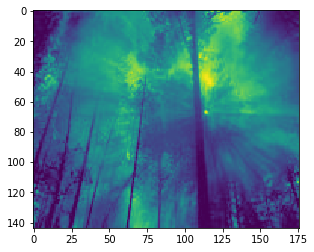

[7.53070176e-03 8.32324749e-03 1.13006839e-02 1.45049927e-02
 1.17295205e-02 8.72367061e-03 4.68790443e-03 5.20626012e-03
 7.02729333e-03 9.33859654e-03 7.35216404e-03 5.43862761e-03
 3.66751049e-03 4.00632970e-03 5.41988169e-03 6.88934664e-03
 5.50473114e-03 4.09250300e-03 3.56805258e-03 3.54375526e-03
 4.78823530e-03 7.60806216e-03 4.87750815e-03 3.50916557e-03
 9.79553410e-04 9.59667103e-04 1.35802133e-03 2.53364047e-03
 1.48754656e-03 1.00215918e-03 4.73879757e-04 4.92110930e-04
 7.05616633e-04 1.21455902e-03 7.93109101e-04 5.29664729e-04
 1.43535909e+00 2.87071818e+00 4.30607721e+00 5.74127024e+00
 7.17679544e-01 3.58839772e-01 2.39226393e-01 1.79312057e-01
 2.39226393e-01 1.10220057e-01 3.50098832e-02 2.56991422e-03]


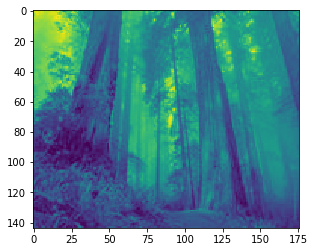

[1.13693288e-02 1.31296904e-02 1.96417871e-02 2.99660453e-02
 1.95879112e-02 1.23346445e-02 6.73781988e-03 7.00654495e-03
 9.25280188e-03 1.56157324e-02 8.58221069e-03 6.62340742e-03
 5.15748107e-03 5.14008216e-03 6.16848981e-03 8.97010532e-03
 5.23608067e-03 4.98564565e-03 6.00413014e-03 6.28902077e-03
 9.00396623e-03 1.83129690e-02 8.90722965e-03 6.02682700e-03
 1.60900745e-03 1.57815242e-03 2.22574883e-03 5.75067627e-03
 2.21095108e-03 1.50202876e-03 7.44666138e-04 6.81116117e-04
 1.02102525e-03 2.34522208e-03 8.52424104e-04 7.14495852e-04
 1.32262869e+00 2.64525739e+00 3.96788603e+00 5.29036171e+00
 6.61314347e-01 3.30657174e-01 2.20438004e-01 1.65229226e-01
 2.20438004e-01 1.01563582e-01 3.22602731e-02 2.49728615e-03]


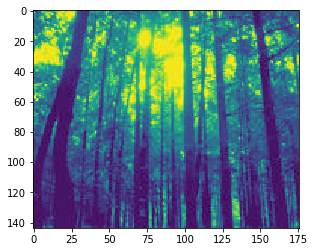

[1.29483351e-02 1.13325650e-02 1.29325943e-02 1.69303100e-02
 1.25586951e-02 1.24566602e-02 6.15569282e-03 5.40671478e-03
 5.89501489e-03 7.50709742e-03 5.94306839e-03 5.64652252e-03
 3.95696687e-03 3.69549698e-03 3.93179774e-03 4.65854801e-03
 3.81379458e-03 3.67859923e-03 8.11117512e-03 6.39203384e-03
 7.24944776e-03 1.14897022e-02 6.66744258e-03 7.25208752e-03
 1.88989430e-03 1.44539190e-03 1.70426997e-03 2.57107789e-03
 1.63554398e-03 1.62800834e-03 7.57192204e-04 5.87421348e-04
 6.76278632e-04 1.02991709e-03 7.28822124e-04 6.72842299e-04
 1.49649358e+00 2.99298717e+00 4.48948069e+00 5.98580115e+00
 7.48246792e-01 3.74123396e-01 2.49415471e-01 1.86949276e-01
 2.49415471e-01 1.14914525e-01 3.65010164e-02 2.18756615e-03]


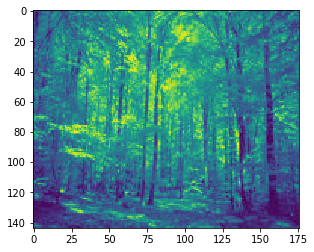

[1.75667855e-02 1.31990199e-02 8.88892850e-03 7.52008407e-03
 9.16452064e-03 1.38585406e-02 1.15595315e-02 8.42254563e-03
 6.07497816e-03 5.72903947e-03 6.32284388e-03 8.92268057e-03
 8.44090044e-03 6.22100082e-03 4.80766233e-03 4.77375081e-03
 5.05255217e-03 6.47430282e-03 8.78510739e-03 4.83060023e-03
 2.67104303e-03 2.71478407e-03 2.85210517e-03 4.98127305e-03
 3.06514077e-03 1.63261886e-03 9.37062680e-04 1.02302181e-03
 1.06025400e-03 1.80265386e-03 1.57608261e-03 8.95302447e-04
 5.33593257e-04 5.92245602e-04 6.25739923e-04 1.00200434e-03
 1.69189022e+00 3.38378045e+00 5.07567060e+00 6.76736509e+00
 8.45945112e-01 4.22972556e-01 2.81981561e-01 2.11359177e-01
 2.81981561e-01 1.29918874e-01 4.12669412e-02 3.07321247e-03]


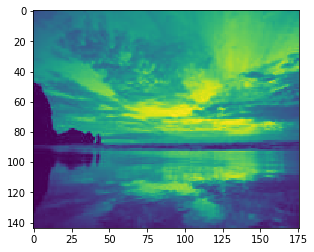

[1.72343851e-02 1.38793065e-02 1.02468804e-02 8.60334467e-03
 9.66417388e-03 1.37494687e-02 1.19283618e-02 9.57196657e-03
 7.48655194e-03 6.87271360e-03 6.89125841e-03 9.16305981e-03
 8.78273523e-03 7.55454713e-03 6.12166799e-03 5.77764036e-03
 5.71237490e-03 7.05528258e-03 7.50283645e-03 4.91241234e-03
 3.07533998e-03 2.93215885e-03 3.18656343e-03 4.87176183e-03
 3.04110531e-03 1.98299830e-03 1.24018444e-03 1.24714083e-03
 1.24605125e-03 1.85706083e-03 1.61539936e-03 1.11993460e-03
 7.20113206e-04 7.11816612e-04 7.43080076e-04 1.00952085e-03
 1.80021715e+00 3.60043429e+00 5.40065136e+00 7.20066024e+00
 9.00108573e-01 4.50054286e-01 3.00036039e-01 2.24891904e-01
 3.00036039e-01 1.38237211e-01 4.39091462e-02 3.45181795e-03]


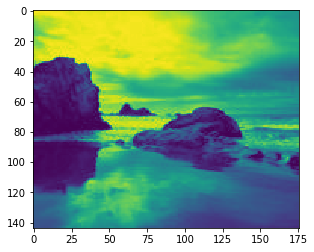

[2.04108798e-02 1.46574528e-02 8.98233321e-03 6.75423660e-03
 1.03558007e-02 1.65200174e-02 1.48837385e-02 9.71036924e-03
 5.67417759e-03 4.51230826e-03 6.29175083e-03 1.13644226e-02
 1.12563375e-02 7.16897974e-03 4.20403372e-03 3.46461140e-03
 4.42662858e-03 8.29293562e-03 9.50342578e-03 4.72970546e-03
 2.58556851e-03 2.83115001e-03 3.14980580e-03 5.51419294e-03
 3.61700126e-03 1.68546577e-03 8.46133423e-04 9.45590880e-04
 1.11653299e-03 2.08280352e-03 2.02475823e-03 8.94087032e-04
 4.50022442e-04 4.83145738e-04 5.83592934e-04 1.14651058e-03
 1.13052946e+00 2.26105893e+00 3.39158834e+00 4.52198702e+00
 5.65264732e-01 2.82632366e-01 1.88421482e-01 1.41231254e-01
 1.88421482e-01 8.68124381e-02 2.75747754e-02 3.08318925e-03]


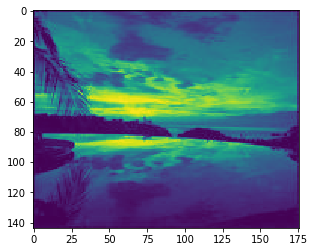

[1.36895976e-02 9.94520340e-03 6.41889804e-03 5.22311603e-03
 7.35656306e-03 1.11749031e-02 9.81714425e-03 6.70509907e-03
 4.25352513e-03 3.38291744e-03 4.80758148e-03 7.19245682e-03
 7.24011342e-03 5.27629066e-03 3.13735266e-03 2.48727272e-03
 3.40518628e-03 5.37862083e-03 6.68537267e-03 3.50091387e-03
 2.14296769e-03 2.15967732e-03 2.44586978e-03 4.11470108e-03
 2.67137157e-03 1.33065983e-03 7.45388621e-04 7.48340746e-04
 9.43402722e-04 1.49451651e-03 1.46750106e-03 7.48555505e-04
 3.82847615e-04 3.83972111e-04 5.22867040e-04 7.72696392e-04
 6.88953098e-01 1.37790620e+00 2.06685926e+00 2.75573266e+00
 3.44481828e-01 1.72242655e-01 1.14828484e-01 8.60750539e-02
 1.14828484e-01 5.29041481e-02 1.68569066e-02 2.08134781e-03]


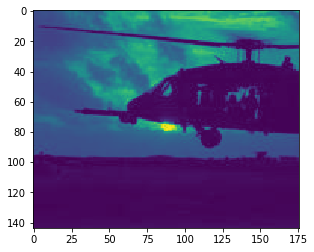

[1.27504072e-02 9.29605772e-03 1.08861588e-02 1.55078332e-02
 1.04722943e-02 8.91049069e-03 6.04618737e-03 4.66787965e-03
 4.74737356e-03 8.68227947e-03 4.32411571e-03 4.25209202e-03
 4.01447134e-03 3.37833434e-03 3.52466920e-03 4.66111356e-03
 3.12811238e-03 3.08592837e-03 9.18696154e-03 4.85181544e-03
 4.66657307e-03 8.84900272e-03 4.50059977e-03 4.51240926e-03
 1.99556735e-03 1.10952658e-03 1.09033740e-03 3.33041117e-03
 1.04152864e-03 9.62173810e-04 7.52490170e-04 5.26161852e-04
 5.09921135e-04 1.28330503e-03 4.56126917e-04 4.63499172e-04
 1.19756780e+00 2.39513559e+00 3.59270334e+00 4.79013259e+00
 5.98783899e-01 2.99391949e-01 1.99594532e-01 1.49606009e-01
 1.99594532e-01 9.19602573e-02 2.92099093e-02 1.99908298e-03]


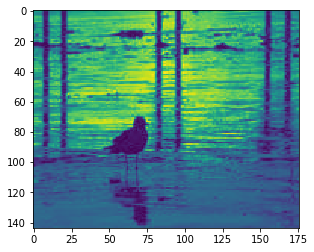

[8.78904897e-03 7.81893868e-03 5.32833941e-03 2.74175682e-03
 3.82882515e-03 6.86229160e-03 8.00853125e-03 7.22942795e-03
 4.74692287e-03 2.11633470e-03 3.36672633e-03 6.23714689e-03
 7.25856261e-03 6.86289891e-03 3.91411178e-03 1.80060444e-03
 2.74124834e-03 5.96890650e-03 3.07407553e-03 1.73326529e-03
 8.46654952e-04 9.20830919e-04 7.82292609e-04 1.58962662e-03
 1.48311343e-03 8.20081372e-04 3.19632371e-04 2.70335753e-04
 2.99086465e-04 7.17796285e-04 9.36182168e-04 6.17909548e-04
 2.36844797e-04 1.38711992e-04 2.23418762e-04 5.37050344e-04
 1.24077001e+00 2.48154003e+00 3.72230999e+00 4.96293646e+00
 6.20385007e-01 3.10192504e-01 2.06794897e-01 1.55003041e-01
 2.06794897e-01 9.52777203e-02 3.02636557e-02 2.77790123e-03]


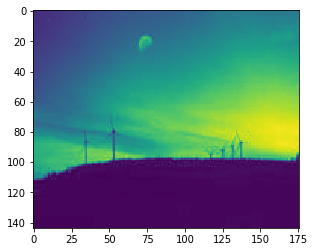

[1.20588935e-02 1.21249606e-02 1.14357345e-02 9.60420228e-03
 9.20449330e-03 1.02032929e-02 7.78085439e-03 7.42432373e-03
 7.12123145e-03 6.91095009e-03 6.24447698e-03 6.48362835e-03
 5.65808737e-03 5.25400887e-03 5.60708118e-03 5.64486328e-03
 5.03030855e-03 4.90052486e-03 5.60532141e-03 5.13113045e-03
 5.27491792e-03 3.67825976e-03 3.47726831e-03 4.19714766e-03
 1.91970709e-03 1.68114211e-03 1.50714215e-03 1.22990011e-03
 1.17194953e-03 1.40138715e-03 1.00656064e-03 8.29844047e-04
 7.71586709e-04 6.86291267e-04 6.87010463e-04 7.43100294e-04
 1.33279660e+00 2.66559320e+00 3.99838975e+00 5.33103216e+00
 6.66398301e-01 3.33199151e-01 2.22132654e-01 1.66499451e-01
 2.22132654e-01 1.02344367e-01 3.25082788e-02 2.56188512e-03]


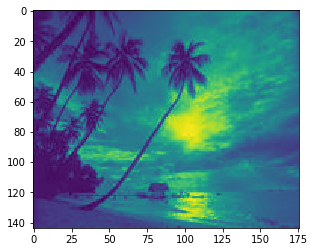

[1.20973641e-02 7.85068170e-03 4.13031909e-03 2.86512756e-03
 5.24073375e-03 9.15235457e-03 8.47164235e-03 5.44353476e-03
 2.93561652e-03 2.10976719e-03 3.73962480e-03 6.55724117e-03
 6.63598400e-03 4.58670820e-03 2.27873833e-03 1.69453748e-03
 2.85390545e-03 5.56734814e-03 6.13726110e-03 2.32491851e-03
 1.04668927e-03 1.22747180e-03 1.19958914e-03 3.01718824e-03
 1.91742502e-03 7.19901759e-04 2.96275593e-04 3.56218256e-04
 3.74949984e-04 1.01660539e-03 9.86868982e-04 4.56871422e-04
 2.11818849e-04 1.72036517e-04 2.60213231e-04 6.78393830e-04
 1.15888179e+00 2.31776358e+00 3.47664531e+00 4.63539303e+00
 5.79440894e-01 2.89720447e-01 1.93146867e-01 1.44773164e-01
 1.93146867e-01 8.89895901e-02 2.82663177e-02 2.33058196e-03]


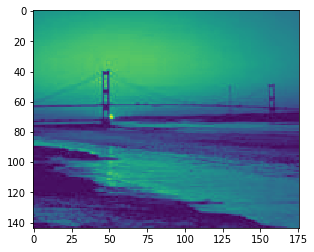

[1.45152496e-02 1.07300504e-02 5.89451854e-03 2.68778336e-03
 5.45109999e-03 1.03688633e-02 9.64291342e-03 7.30053638e-03
 3.93465489e-03 1.51000600e-03 3.46330440e-03 6.90856849e-03
 7.62994009e-03 6.09607880e-03 2.82110868e-03 1.13143459e-03
 2.42327852e-03 5.76670133e-03 7.54663510e-03 3.82324190e-03
 1.61701303e-03 1.21020422e-03 1.62719672e-03 3.69325144e-03
 2.41457613e-03 1.27007879e-03 4.60824632e-04 3.09446456e-04
 4.34247934e-04 1.17147623e-03 1.25815596e-03 6.59516467e-04
 2.52542768e-04 1.45703840e-04 2.23827338e-04 6.04923204e-04
 1.34739090e+00 2.69478180e+00 4.04217264e+00 5.38940766e+00
 6.73695449e-01 3.36847725e-01 2.24565036e-01 1.68322641e-01
 2.24565036e-01 1.03465051e-01 3.28642486e-02 2.74105943e-03]


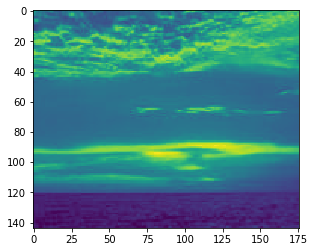

[9.71523249e-03 8.22681843e-03 1.00221425e-02 1.19592635e-02
 9.49278836e-03 8.27981823e-03 6.25833220e-03 5.47468046e-03
 6.89687113e-03 9.25799038e-03 6.00149870e-03 5.13893398e-03
 4.55951759e-03 4.36129286e-03 5.28094711e-03 6.92179620e-03
 4.27167802e-03 3.96104414e-03 4.60047969e-03 2.55018652e-03
 3.04402997e-03 4.82679393e-03 2.95091347e-03 2.72714398e-03
 1.45170798e-03 7.91112445e-04 1.06019386e-03 2.08338762e-03
 1.01665578e-03 8.47511724e-04 7.30413408e-04 4.97733938e-04
 6.12689012e-04 1.17119703e-03 5.78037274e-04 5.35919542e-04
 1.64013329e+00 3.28026659e+00 4.92039981e+00 6.56034336e+00
 8.20066647e-01 4.10033324e-01 2.73355410e-01 2.04893449e-01
 2.73355410e-01 1.25944502e-01 4.00045365e-02 2.95600976e-03]


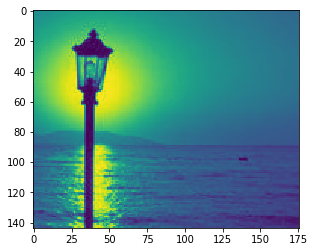

[1.60495920e-02 1.06435102e-02 5.34790648e-03 2.82838451e-03
 5.26452649e-03 1.07793306e-02 1.03820234e-02 6.41758292e-03
 3.11522390e-03 2.12365108e-03 3.02975937e-03 6.36748228e-03
 7.34271396e-03 4.39435631e-03 2.28825368e-03 1.74397171e-03
 2.28989787e-03 4.33949890e-03 9.02163300e-03 3.66193727e-03
 1.22672187e-03 9.78446647e-04 1.33417230e-03 3.95137219e-03
 3.25225634e-03 1.28573458e-03 4.29085275e-04 3.58634687e-04
 4.28618183e-04 1.30373805e-03 1.64786524e-03 6.32024938e-04
 2.55653747e-04 1.97876435e-04 2.42625418e-04 6.33178899e-04
 9.32450858e-01 1.86490172e+00 2.79735253e+00 3.72969552e+00
 4.66225429e-01 2.33112714e-01 1.55408397e-01 1.16486308e-01
 1.55408397e-01 7.16021430e-02 2.27434346e-02 1.76934133e-03]


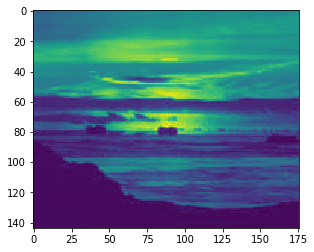

[8.04419654e-03 6.50379869e-03 4.33602146e-03 3.40181165e-03
 4.41955024e-03 6.60114544e-03 6.51367519e-03 5.23140211e-03
 3.49406736e-03 2.88682890e-03 3.59267406e-03 5.28877324e-03
 5.50118649e-03 4.71224349e-03 2.91797325e-03 2.56535784e-03
 3.03258866e-03 4.84604181e-03 2.79169601e-03 1.71595207e-03
 9.99595965e-04 9.41523810e-04 1.01933831e-03 1.74078834e-03
 1.07196998e-03 5.99901435e-04 3.48443621e-04 3.29250481e-04
 3.64099421e-04 6.10146565e-04 6.06472597e-04 3.59581845e-04
 2.25442678e-04 1.88593448e-04 2.34328237e-04 3.63622445e-04
 1.04044957e+00 2.08089914e+00 3.12134867e+00 4.16167787e+00
 5.20224785e-01 2.60112393e-01 1.73408174e-01 1.29978034e-01
 1.73408174e-01 7.98952764e-02 2.53776342e-02 1.65384223e-03]


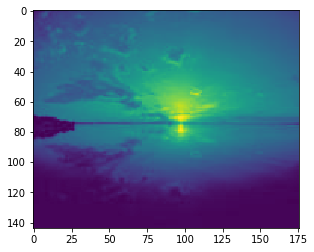

[1.49122893e-02 1.11473548e-02 6.95649211e-03 4.94999298e-03
 7.13884622e-03 1.14970054e-02 1.12461415e-02 8.57591970e-03
 5.14541851e-03 3.48292126e-03 5.32098914e-03 8.97904057e-03
 9.28772871e-03 7.52305912e-03 4.00966945e-03 2.75375968e-03
 4.03832313e-03 7.69790969e-03 7.34156197e-03 3.70223809e-03
 2.22450888e-03 1.92199829e-03 2.13178843e-03 3.86252041e-03
 2.58092658e-03 1.39542337e-03 8.23660370e-04 7.04496473e-04
 8.13184217e-04 1.52680722e-03 1.49745444e-03 8.30954639e-04
 4.64230725e-04 3.82285214e-04 4.71549790e-04 9.38931292e-04
 1.55624209e+00 3.11248418e+00 4.66872620e+00 6.22478824e+00
 7.78121044e-01 3.89060522e-01 2.59373550e-01 1.94413351e-01
 2.59373550e-01 1.19502564e-01 3.79583438e-02 3.20006012e-03]


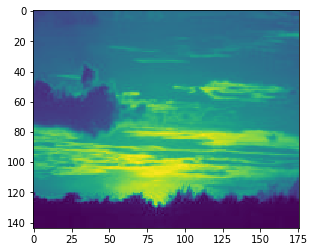

[1.01136484e-02 8.91707503e-03 7.13558509e-03 6.23944946e-03
 6.77779944e-03 8.41239974e-03 6.99538258e-03 6.21850145e-03
 5.03560029e-03 4.82958790e-03 5.03348416e-03 5.75121552e-03
 5.22979621e-03 5.04215307e-03 3.98323417e-03 4.02783274e-03
 4.16768947e-03 4.59730298e-03 4.28753384e-03 3.56445817e-03
 2.53555528e-03 2.13444165e-03 2.28522535e-03 3.06539486e-03
 1.63101846e-03 1.27117810e-03 9.50627949e-04 8.01800764e-04
 8.73306473e-04 1.14492278e-03 8.53925020e-04 7.09904224e-04
 5.23980634e-04 4.63254564e-04 5.13078042e-04 6.50107298e-04
 7.87588516e-01 1.57517703e+00 2.36276552e+00 3.15026292e+00
 3.93794258e-01 1.96897129e-01 1.31264686e-01 9.83893981e-02
 1.31264686e-01 6.04782817e-02 1.92189354e-02 1.86455321e-03]


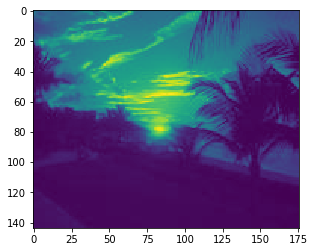

[1.86224931e-02 1.24144869e-02 7.28524239e-03 6.36694369e-03
 1.04774733e-02 1.58314347e-02 1.20680951e-02 6.57094613e-03
 3.34028049e-03 3.37655150e-03 5.31690862e-03 8.90196570e-03
 8.17172506e-03 4.04845541e-03 2.06044643e-03 2.17834698e-03
 3.16500748e-03 5.61553527e-03 9.22037546e-03 4.61589299e-03
 2.77112517e-03 2.91837104e-03 4.00564546e-03 6.32806128e-03
 3.49169042e-03 1.45148951e-03 7.58355299e-04 9.13362555e-04
 1.33142299e-03 2.07918646e-03 1.88247790e-03 6.64723866e-04
 3.82535814e-04 4.45665118e-04 6.45580607e-04 1.02476382e-03
 1.38997226e+00 2.77994452e+00 4.16991672e+00 5.55972818e+00
 6.94986130e-01 3.47493065e-01 2.31661926e-01 1.73642113e-01
 2.31661926e-01 1.06734839e-01 3.39028518e-02 2.48461163e-03]


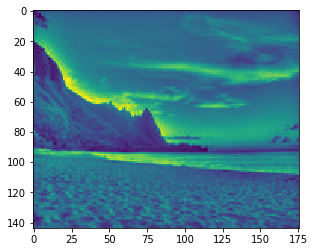

[1.78352790e-02 1.39172129e-02 8.99650294e-03 6.93576766e-03
 9.41156434e-03 1.40639340e-02 1.34035437e-02 9.37549856e-03
 5.72179869e-03 4.87969065e-03 5.91155907e-03 9.32679025e-03
 1.02666944e-02 7.32094360e-03 4.23222065e-03 3.77044457e-03
 4.23122846e-03 7.09194532e-03 8.80049662e-03 5.05477609e-03
 3.07489471e-03 2.90798059e-03 3.15606105e-03 5.13550590e-03
 3.46700665e-03 1.76288350e-03 1.02849202e-03 1.10983850e-03
 1.09281954e-03 1.79424341e-03 1.93713465e-03 9.14658802e-04
 5.80157718e-04 6.25220590e-04 5.86441813e-04 9.45526441e-04
 1.30025879e+00 2.60051757e+00 3.90077630e+00 5.20088466e+00
 6.50129393e-01 3.25064696e-01 2.16709688e-01 1.62434668e-01
 2.16709688e-01 9.98458147e-02 3.17489068e-02 3.06060004e-03]


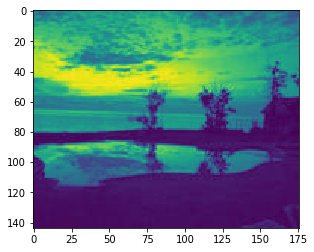

[8.07586522e-03 6.88026412e-03 5.36395778e-03 4.78208984e-03
 5.15642117e-03 6.56271150e-03 5.35293274e-03 4.91997511e-03
 3.90923114e-03 3.60596081e-03 3.75112762e-03 4.47140841e-03
 4.08729437e-03 3.96611887e-03 3.15746154e-03 2.99303304e-03
 3.00448801e-03 3.60586863e-03 3.54020301e-03 2.26588157e-03
 1.48501092e-03 1.48336702e-03 1.60405489e-03 2.44869963e-03
 1.20287595e-03 8.75692113e-04 5.41708369e-04 5.81551435e-04
 6.39319775e-04 8.35604032e-04 6.02562615e-04 5.33227053e-04
 3.08520526e-04 3.41439986e-04 3.88167028e-04 4.70483949e-04
 9.23145942e-01 1.84629188e+00 2.76943779e+00 3.69247693e+00
 4.61572971e-01 2.30786486e-01 1.53857579e-01 1.15323893e-01
 1.53857579e-01 7.08876262e-02 2.25164782e-02 1.64338463e-03]


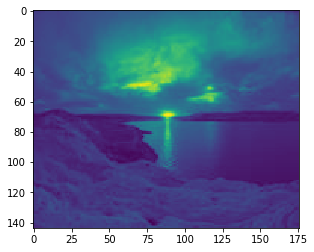

[1.65903516e-02 1.56759381e-02 1.34967672e-02 1.32229005e-02
 1.24166446e-02 1.39644428e-02 1.16458973e-02 9.92430322e-03
 7.25443965e-03 7.38818150e-03 6.73677898e-03 8.63016146e-03
 8.81160593e-03 7.05922036e-03 4.50979078e-03 4.60482850e-03
 4.44934698e-03 6.25623657e-03 7.71330501e-03 6.76225034e-03
 6.14710485e-03 7.22525342e-03 5.51501405e-03 6.15505841e-03
 2.70740349e-03 2.25146763e-03 1.90008104e-03 2.30881482e-03
 1.72533030e-03 1.90296622e-03 1.54664989e-03 1.17925455e-03
 8.32095631e-04 1.08570728e-03 7.52646875e-04 9.36489513e-04
 8.65829389e-01 1.73165878e+00 2.59748813e+00 3.46321735e+00
 4.32914695e-01 2.16457949e-01 1.44304825e-01 1.08163630e-01
 1.44304825e-01 6.64863347e-02 2.11831001e-02 2.89026226e-03]


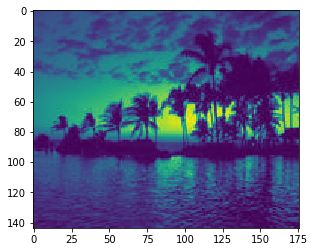

[7.58974516e-03 5.99921475e-03 3.57307690e-03 2.57866302e-03
 3.68238792e-03 5.85555798e-03 6.21109842e-03 4.94056424e-03
 2.93899340e-03 2.15137737e-03 3.16193135e-03 5.02002718e-03
 5.32107343e-03 4.65091735e-03 2.45009626e-03 1.86686397e-03
 2.64781387e-03 4.65909766e-03 2.71986738e-03 1.67221252e-03
 7.79664194e-04 5.60085438e-04 7.16383531e-04 1.55437365e-03
 1.12734486e-03 6.77685190e-04 3.20233309e-04 2.29395206e-04
 2.91233345e-04 6.50303795e-04 6.68908101e-04 4.78608710e-04
 2.47121693e-04 1.38729836e-04 2.34976546e-04 4.71036879e-04
 1.22527466e+00 2.45054932e+00 3.67582393e+00 4.90095683e+00
 6.12637330e-01 3.06318665e-01 2.04212340e-01 1.53067285e-01
 2.04212340e-01 9.40878447e-02 2.98857081e-02 2.15969772e-03]


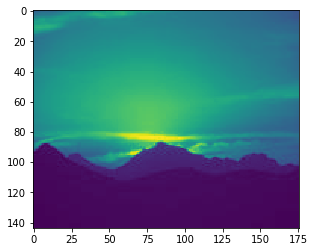

[7.53428921e-03 6.71130911e-03 5.54420001e-03 4.98886263e-03
 5.41877939e-03 6.65497382e-03 6.63986420e-03 5.74470521e-03
 4.72039061e-03 4.12498362e-03 4.53938741e-03 5.79637192e-03
 5.83281135e-03 5.15979056e-03 3.96031520e-03 3.50650201e-03
 3.86358194e-03 5.24781120e-03 1.84446042e-03 1.87370809e-03
 1.70641869e-03 1.29173297e-03 1.54911315e-03 1.64875317e-03
 8.82765493e-04 8.72417725e-04 7.95280923e-04 5.91165167e-04
 6.85580739e-04 7.67369638e-04 5.79869133e-04 5.59035983e-04
 5.13537614e-04 3.88437298e-04 4.35950236e-04 5.17324832e-04
 7.46613845e-01 1.49322769e+00 2.23984150e+00 2.98636897e+00
 3.73306922e-01 1.86653461e-01 1.24435578e-01 9.32706423e-02
 1.24435578e-01 5.73318700e-02 1.82106789e-02 2.15926753e-03]


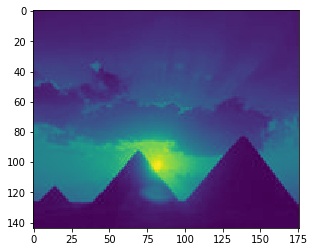

[1.19790671e-02 8.54992638e-03 4.44083503e-03 2.92090498e-03
 4.95052585e-03 8.65519313e-03 8.64024833e-03 5.90999240e-03
 2.96779701e-03 2.40397146e-03 3.69343171e-03 6.28577666e-03
 6.77629280e-03 4.94200158e-03 2.32548012e-03 2.15481936e-03
 3.00576053e-03 5.33185090e-03 6.12914076e-03 2.88821021e-03
 1.04038923e-03 7.95808983e-04 9.41973395e-04 2.48996946e-03
 2.14562148e-03 9.37251043e-04 3.03648860e-04 2.25775243e-04
 2.86756344e-04 8.18295823e-04 1.08202656e-03 5.46153897e-04
 2.58890632e-04 1.30424627e-04 2.65611918e-04 5.10571790e-04
 1.80131270e+00 3.60262539e+00 5.40393801e+00 7.20504232e+00
 9.00656348e-01 4.50328174e-01 3.00218630e-01 2.25028766e-01
 3.00218630e-01 1.38321337e-01 4.39358678e-02 2.61393411e-03]


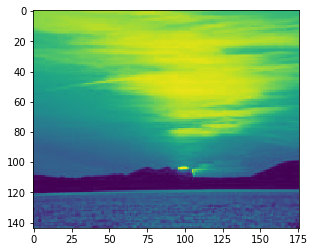

[4.53692272e-03 4.55619143e-03 5.55361291e-03 6.80182374e-03
 5.90937060e-03 4.83459847e-03 3.69916673e-03 3.36026892e-03
 3.73117608e-03 4.62758648e-03 4.28430797e-03 3.78096640e-03
 3.16842473e-03 2.81899148e-03 3.16129964e-03 3.68640776e-03
 3.64251660e-03 3.25699746e-03 1.35321408e-03 1.45977610e-03
 2.17913320e-03 3.39107365e-03 2.21102274e-03 1.47062770e-03
 5.69665613e-04 4.92446698e-04 6.39578300e-04 9.97695595e-04
 6.55406332e-04 5.20128823e-04 3.79250198e-04 3.15672081e-04
 3.63792135e-04 5.17888458e-04 3.89799418e-04 3.34899563e-04
 1.34450383e+00 2.68900765e+00 4.03351142e+00 5.37785970e+00
 6.72251913e-01 3.36125957e-01 2.24083857e-01 1.67961974e-01
 2.24083857e-01 1.03243355e-01 3.27938300e-02 2.23677132e-03]


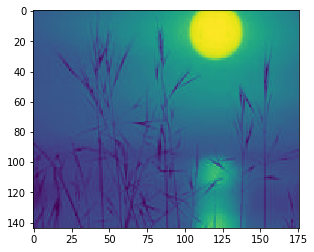

[7.05708163e-03 6.19809372e-03 4.96583824e-03 4.57831142e-03
 4.99410149e-03 6.15243376e-03 5.95393050e-03 4.99829500e-03
 3.77423803e-03 3.53698621e-03 3.91216218e-03 5.17116088e-03
 5.14758685e-03 4.40575352e-03 2.96401770e-03 2.85551173e-03
 3.15128873e-03 4.61815737e-03 2.53388511e-03 1.68316698e-03
 1.30095825e-03 1.79307532e-03 1.27979435e-03 1.63406190e-03
 1.06276558e-03 6.57048877e-04 4.99894558e-04 6.83636729e-04
 4.91368969e-04 6.79159094e-04 6.39175227e-04 4.11629190e-04
 3.20278320e-04 3.67136856e-04 3.07448090e-04 4.54308239e-04
 6.40499572e-01 1.28099914e+00 1.92149869e+00 2.56192416e+00
 3.20249786e-01 1.60124893e-01 1.06749874e-01 8.00143298e-02
 1.06749874e-01 4.91834412e-02 1.56224428e-02 1.51295651e-03]


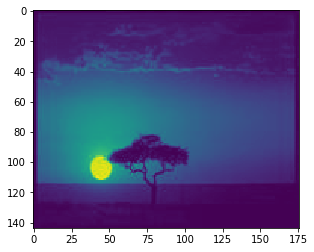

[1.07649336e-02 8.70436185e-03 5.92658934e-03 4.60787431e-03
 5.76661913e-03 8.68407092e-03 8.50781451e-03 6.35340746e-03
 4.16431259e-03 3.40175368e-03 4.21726694e-03 6.41999095e-03
 6.93856994e-03 5.56691187e-03 3.24609811e-03 2.79893659e-03
 3.45283806e-03 5.62087413e-03 5.19465060e-03 2.87184065e-03
 1.79788858e-03 1.82708832e-03 1.54008652e-03 2.83432644e-03
 2.08340955e-03 9.42481185e-04 5.32979285e-04 5.85564674e-04
 5.30303280e-04 1.01554093e-03 1.17004842e-03 5.58582215e-04
 3.29522037e-04 2.93279210e-04 3.30211954e-04 6.22604673e-04
 1.29792230e+00 2.59584461e+00 3.89376685e+00 5.19153900e+00
 6.48961152e-01 3.24480576e-01 2.16320274e-01 1.62142783e-01
 2.16320274e-01 9.96663981e-02 3.16576588e-02 2.68618804e-03]


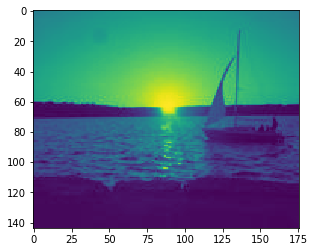

[1.54760003e-02 1.02100087e-02 5.30566875e-03 4.02911149e-03
 5.31121708e-03 9.78874246e-03 7.95884969e-03 5.26276300e-03
 3.19430115e-03 2.86726676e-03 3.17883616e-03 4.99111992e-03
 5.28303272e-03 4.02725937e-03 2.52795438e-03 2.44142089e-03
 2.59328192e-03 3.81016781e-03 1.00253437e-02 5.06305505e-03
 2.05576778e-03 1.81468129e-03 2.18370053e-03 4.85815484e-03
 2.81747891e-03 1.16557799e-03 4.66215782e-04 4.66031993e-04
 4.84276472e-04 1.08017501e-03 1.09653895e-03 4.86123739e-04
 2.35644760e-04 2.37472637e-04 2.20410281e-04 4.86083046e-04
 5.18513056e-01 1.03702611e+00 1.55553915e+00 2.07399222e+00
 2.59256528e-01 1.29628264e-01 8.64187989e-02 6.47751795e-02
 8.64187989e-02 3.98161959e-02 1.26470663e-02 1.39272588e-03]


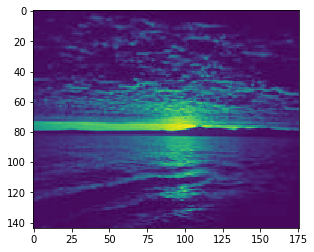

[8.45148886e-03 6.74760729e-03 4.19273070e-03 2.67690950e-03
 2.91737801e-03 5.17686135e-03 5.70107561e-03 4.97949702e-03
 3.48297538e-03 2.39382125e-03 2.30853975e-03 3.96816119e-03
 4.67883277e-03 4.36988838e-03 3.03269116e-03 2.19703276e-03
 1.92229197e-03 3.55720459e-03 4.22455679e-03 2.16438628e-03
 6.84936051e-04 5.37196257e-04 6.54613740e-04 1.56837873e-03
 1.25384774e-03 7.06697584e-04 2.50458760e-04 1.96765426e-04
 2.21289918e-04 4.68853023e-04 6.28084919e-04 3.94962211e-04
 2.02777057e-04 1.24679296e-04 1.98491026e-04 2.80101771e-04
 1.54152204e+00 3.08304409e+00 4.62456606e+00 6.16590977e+00
 7.70761022e-01 3.85380511e-01 2.56920210e-01 1.92574451e-01
 2.56920210e-01 1.18372224e-01 3.75993068e-02 2.16682162e-03]


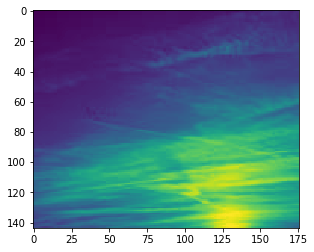

[2.30064192e-02 1.68509002e-02 9.18950257e-03 6.43061440e-03
 9.94468967e-03 1.76181274e-02 1.72293047e-02 1.11176810e-02
 6.59490171e-03 5.44416178e-03 6.72565397e-03 1.19736417e-02
 1.27231430e-02 8.57344651e-03 5.38394232e-03 4.84823216e-03
 5.35584142e-03 9.03140754e-03 9.58677754e-03 4.51812942e-03
 1.68855228e-03 1.45345235e-03 1.97944568e-03 5.17665638e-03
 4.09356866e-03 1.77280971e-03 6.26377271e-04 5.46602726e-04
 7.36160592e-04 2.15748664e-03 2.37856947e-03 1.01411900e-03
 4.52749941e-04 3.47523214e-04 4.98934796e-04 1.26858463e-03
 1.72998925e+00 3.45997851e+00 5.18996769e+00 6.91975680e+00
 8.64994627e-01 4.32497314e-01 2.88331396e-01 2.16118694e-01
 2.88331396e-01 1.32844468e-01 4.21962157e-02 3.74726569e-03]


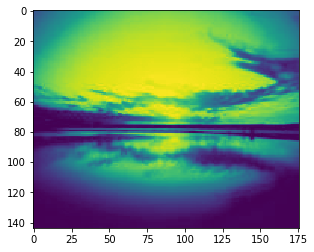

[7.42978557e-03 6.07096730e-03 3.95250803e-03 2.29574070e-03
 4.04821561e-03 6.45478480e-03 6.89877326e-03 5.71285468e-03
 3.25993947e-03 1.57947421e-03 3.52553492e-03 6.04075017e-03
 6.41001902e-03 5.55551796e-03 2.52682307e-03 1.26997801e-03
 2.82014675e-03 5.86299539e-03 2.23399279e-03 1.35084974e-03
 1.17753542e-03 1.10249220e-03 9.87471866e-04 1.46201911e-03
 1.04842787e-03 5.99308717e-04 3.62998712e-04 3.45225086e-04
 3.88191719e-04 7.12600784e-04 6.85308262e-04 4.98932943e-04
 2.91561138e-04 1.79256557e-04 3.30323569e-04 6.13225018e-04
 1.56760402e+00 3.13520804e+00 4.70281199e+00 6.27023466e+00
 7.83802010e-01 3.91901005e-01 2.61267204e-01 1.95832738e-01
 2.61267204e-01 1.20375038e-01 3.82354730e-02 2.87445169e-03]


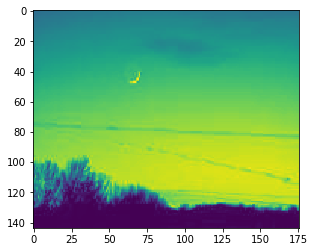

[1.69900599e-02 1.21144172e-02 9.14438877e-03 9.81871072e-03
 1.17966153e-02 1.43354408e-02 1.05161950e-02 8.14630949e-03
 5.59718260e-03 5.63718792e-03 6.57091967e-03 9.04608006e-03
 8.30641397e-03 6.58009359e-03 4.31721804e-03 4.11660695e-03
 4.88654993e-03 6.92676182e-03 1.01651659e-02 4.95477034e-03
 3.79652721e-03 5.12861530e-03 6.19689649e-03 6.94831599e-03
 2.59440108e-03 1.41436115e-03 9.64014935e-04 1.36845744e-03
 1.39198924e-03 1.97826419e-03 1.35300438e-03 8.02374886e-04
 4.85335622e-04 5.94550866e-04 6.58358903e-04 1.02285340e-03
 1.12347655e+00 2.24695310e+00 3.37042960e+00 4.49377617e+00
 5.61743093e-01 2.80869137e-01 1.87245996e-01 1.40350169e-01
 1.87245996e-01 8.62708505e-02 2.74027476e-02 3.10380667e-03]


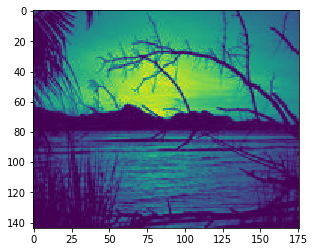

[1.46140089e-02 1.09230660e-02 7.81068893e-03 7.46947586e-03
 8.30724785e-03 1.12412406e-02 8.27332444e-03 5.73068422e-03
 4.54629371e-03 4.75348032e-03 4.65124983e-03 5.99289568e-03
 5.36332192e-03 3.78715059e-03 3.21574894e-03 3.51129068e-03
 3.32849665e-03 4.20080910e-03 7.90047595e-03 4.79132907e-03
 3.30155587e-03 3.50722801e-03 3.56074129e-03 5.05296429e-03
 2.49574271e-03 1.37514168e-03 1.01871026e-03 1.08297712e-03
 1.05906962e-03 1.50203660e-03 1.16660433e-03 6.07186501e-04
 5.07843303e-04 6.04683065e-04 5.23182493e-04 6.80263040e-04
 1.11694531e+00 2.23389062e+00 3.35083588e+00 4.46765197e+00
 5.58472655e-01 2.79236327e-01 1.86157457e-01 1.39534255e-01
 1.86157457e-01 8.57693220e-02 2.72434439e-02 2.08984410e-03]


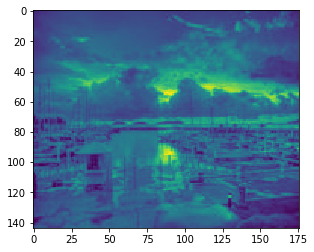

Wall time: 13min 58s


In [49]:
%%time

def get_class_features(all_images,  filter_bank):

    n_images = len(all_images)
    n_filters = filter_bank.shape[-1]
    all_feature_vectors=np.zeros((n_images,filter_bank.shape[-1]))
    
    # Complete
    for i in range(n_images):
        im = skimage.color.rgb2gray(all_images[i])
      
        im_features = features_from_filter_bank(im, filter_bank, n_filters)
        print(im_features)
        
        all_feature_vectors[i][:] = im_features
        plt.imshow(im)
        plt.show()

        
    return all_feature_vectors

all_feature_vectors=get_class_features(all_images,  filter_bank)

In [26]:
#### TODO optimize features_from_filter_bank and get_class_features code
print(all_feature_vectors)

[[1.02325474e-02 9.38602050e-03 1.10111247e-02 1.79974524e-02
  1.17656345e-02 9.14105901e-03 5.76630894e-03 5.18027336e-03
  5.53269666e-03 8.54442972e-03 5.76556131e-03 5.23246662e-03
  4.30229345e-03 4.03787372e-03 3.78284427e-03 5.21577586e-03
  3.92285323e-03 3.97488851e-03 7.07215326e-03 4.61737854e-03
  5.01214987e-03 1.28396782e-02 5.42079801e-03 4.34823868e-03
  1.66250039e-03 1.09327377e-03 1.21318224e-03 3.15662306e-03
  1.36735511e-03 1.05324315e-03 8.12817654e-04 6.07855636e-04
  6.55114196e-04 1.30036608e-03 6.79849933e-04 6.40524492e-04
  2.15946377e+00 4.31892754e+00 6.47839122e+00 8.63760516e+00
  1.07973188e+00 5.39865942e-01 3.59910446e-01 2.69770745e-01
  3.59910446e-01 1.65823467e-01 5.26715405e-02 3.32465602e-03]
 [1.02325474e-02 9.38602050e-03 1.10111247e-02 1.79974524e-02
  1.17656345e-02 9.14105901e-03 5.76630894e-03 5.18027336e-03
  5.53269666e-03 8.54442972e-03 5.76556131e-03 5.23246662e-03
  4.30229345e-03 4.03787372e-03 3.78284427e-03 5.21577586e-03
  3.922

## Exercise 5.4 Visualizing the features of an image

Define a function `visualize_features` that given a feature index and an array containing all feature vectors, plots its values for the three datasets using different colors for each dataset (in total plots should contain 3 colors).


In [14]:
def visualize_features(k, all_feature_vectors):
    # complete
    
    # 3 sets, 30 images for each set
    SETS_NUM = 3
    SET_SIZE = 30
    
    sets = { "building" : "blue","forest": "green","sunset": "red"}
    fig, ax = plt.subplots()
    
    #set number
    j = 1
    for key, value in sets.items():
        for i in range(SET_SIZE):
            n = 750
            x, y = (i, 10*all_feature_vectors[i*j][k])
            
            scale = 20.0     
            ax.scatter(x, y, c=value, label=key s=scale,edgecolors='none')
            
        j+=1

    ax.grid(True)

    plt.show()
    return None





visualize_features(25, all_feature_vectors)    
visualize_features(41, all_feature_vectors)

SyntaxError: invalid syntax (<ipython-input-14-e9636b2835c5>, line 19)





#### Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$


## Exercise 5.5 Retrieving the most similar and different images



Implement a function `retrieve_k_images_from_X(query, X, k)` where `query` is an image,  `X` ins the array containing the features from all the images and  `k` is an integer. The function should retrieve the `k` most similar and distant images (according to the l2 norm) and the distances from the closest and the furthest images to the query image. You can include the query image since it is in `X`.

- Make a plot with the first column beeing the query image and the other k columns the closest images in the feature space.

In [ ]:
X = np.array(all_feature_vectors)
ind_1 = 6
ind_2 = 30
ind_3 = 65

query_1 = X[6, :]
query_2 = X[30,:]
query_3 = X[65,:]


# Display the query images
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,3))
ax[0].imshow(all_images[6]) 
ax[1].imshow(all_images[30])
ax[2].imshow(all_images[65])

In [ ]:
def retrieve_k_images_from_X(query, X, k):
    #Complete
    distances = None
    closest_to_query = None
    closest_images =None
    
    return closest_images, distances


## Exercise 5.6 Retrieving the most similar image based on the information about color

Based on exercises 5.3 and 5.4:
1)  Implement a function `get_rgb_Features(all_images)` that obtains the RGB information by applying `exposure.histogram(image,nbins=32)` to get a feature vector for each of the images in the union of the three datasets (forest, buildings, sunset). It must return a matrix containing at row $k$ feature vector for the input image $k$.

2)  Use the same function `retrieve_k_images_from_X(query, X, k)` where `query` is an image, `X` ins the array containing the features from all the images and  `k` is an integer. The function should retrieve the `k` most similar and distant images (according to the l2 norm) and the distances from the closest and the furthest images to the query image. You can include the query image since it is in `X`.

- And again, make a plot with the first column beeing the query image and the other k columns the closest images in the feature space.

## Exercise 5.7 Compute the accuracy of the algorithm: given a query image. 

Make a function 

```
accuracy(X, class_labels, k=5, query=x, class_query=y)
```

That takes as input a the dataset `X`, the `class_labels` for the images, the number of images to retrieve `k`, a query image `x` and the class of the query image `y`. Returns as output the number of retrieved images that belong to class `y` divided by the total of images retrieved `k` (this is the accuracy).

**Hint**: be careful to exclude the query image from the retrieved images.



- Compute the accuracy with k=4 with the previous images. Does the accuracy match the images retrieved from the previous exercise?



In [ ]:
class_labels = np.concatenate((np.zeros(30), np.ones(30),  2*np.ones(30))).reshape(90,1)

In [ ]:
def accuracy(X, class_labels, k, query, class_query):
    # Complete
    return acc


- Compute the accuracy for both cases, when X is obtained by (A) applying the bank of filters or (B) the color information.



- Compare the results obtained. Which descriptors give better performance? Can you explain why?

## Exercise 5.8 Image retrieval based on texture and color. 

Make a function ` lm_features_rgb(image, filter_bank)`  that returns the features from the filter bank concatenated per color. If the previous feature vectors had 49 components now they will have 49*3 components. 


In [ ]:

def lm_features_rgb(image, filter_bank):

    n_filters = len(filter_bank)
    im_conv = np.array(image[:,:,0])
    features_for_im = np.zeros(3*n_filters)
    # Complete
        
    return features_for_im

## Exercise 5.9 Apply the function to all the images in the dataset

Using ` lm_features_rgb(image, filter_bank)` build the features of all the datapoints in and save them in `X_lm_rgb`.
You can parallelize the feature building process using `joblib.Parallel`. This will make the computation much faster if you have a processor with more than two threads.

## 5.10 Compute the accuracy of the method using lm rgb features

Use the function implemented in 5.6 to compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

- Is the accuracy higher?

In [ ]:
# compute (X_lm_rgb) and cast it as array
X_lm_rgb = np.array(X_lm_rgb)